In [ ]:
!pip install pyabsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 37.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer
# importing all necessary packages
from os import listdir
from os.path import join
from sklearn.model_selection import train_test_split
import string
from torch.utils.data import Dataset, DataLoader
import torch
#import torchmetrics
#import pytorch_lightning as pl
#from transformers import AutoModelForSequenceClassification
#from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger
#from pytorch_lightning.callbacks import ModelCheckpoint
#from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

import re
import spacy
import tqdm
from tqdm import tqdm


from pyabsa import ATEPCCheckpointManager

aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='english',
                                   auto_device=True  # False means load model on CPU
)


[2024-04-21 12:53:27] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-04-21 12:53:27] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-04-21 12:53:27] (2.4.1.post1) Downloading checkpoint:english 
[2024-04-21 12:53:27] (2.4.1.post1) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets
[2024-04-21 12:53:27] (2.4.1.post1) Checkpoint already downloaded, skip
[2024-04-21 12:53:27] (2.4.1.post1) Load aspect extractor from checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43
[2024-04-21 12:53:27] (2.4.1.post1) config: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.config
[2024-04-21 12:53:27] (2.4.1.post1) state_dict: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apc

In [340]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/MyDrive/BT5151 + BT5153 /BT5151 - Amazon Food Sentiment Analysis/'
    #print(path_to_file)
    # move to Google Drive directory
    os.chdir(path_to_file)
    !pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/BT5151 + BT5153 /BT5151 - Amazon Food Sentiment Analysis


# Aspect-Based Sentiment Analysis on Top 1 Product

## Run PyABSA to get aspects and their sentiments

In [ ]:
df_1 = pd.read_csv('top_product_1.csv')
df_1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

ProductId                                       Summary_Text  Sentiment  \
0    B007JFMH8M  Delicious! I love these cookies!  Not only are...          1   
1    B007JFMH8M  Great Anytime of Day! Quaker Soft Baked Oatmea...          1   
2    B007JFMH8M  Very good! I am usually not a huge fan of oatm...          1   
3    B007JFMH8M  Quaker Oats Oatmeal Raisin Mom Voxbox Review C...          1   
4    B007JFMH8M  Quick, simple HEALTHY snack for the kiddos!!! ...          1   
..          ...                                                ...        ...   
908  B007JFMH8M  Yummy! I loved these cookies and so did my kid...          1   
909  B007JFMH8M  Quaker Soft Baked Cookies This is a great tast...          1   
910  B007JFMH8M  Delicious! These are great for a quick snack! ...          1   
911  B007JFMH8M  yummy I love the Quaker soft baked cookies.  T...          1   
912  B007JFMH8M  Quaker Soft Baked Cookie This cookie is really...          1   

     Predictions  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
908            1  
909            1  
910            1  
911            1  
912            1  

[913 rows x 4 columns]

In [ ]:
df_1['Summary_Text'] = df_1['Summary_Text'].str.lower()

df_1['Summary_Text'] = df_1['Summary_Text'].apply(lambda x: [x])

In [ ]:
# Convert the 'Summary_Text' column to a list
inference_source = df_1['Summary_Text'].tolist()

result = []

# Extract aspects using ATEPC
for text in inference_source:
    atepc_result = aspect_extractor.extract_aspect(inference_source=text, pred_sentiment=True)
    result.append(atepc_result)

# Print the result
print(result)


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

[2024-04-20 14:44:14] (2.4.1.post1) The results of aspect term extraction have been saved in /content/gdrive/MyDrive/BT5151 + BT5153 /BT5151 - Amazon Food Sentiment Analysis/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-20 14:44:15] (2.4.1.post1) Example 0: delicious ! i love these <cookies:Positive Confidence:0.9991> ! not only are they healthy but they taste great and are so soft ! i will definitely add these to my grocery list !
[2024-04-20 14:44:16] (2.4.1.post1) The results of aspect term extraction have been saved in /content/gdrive/MyDrive/BT5151 + BT5153 /BT5151 - Amazon Food Sentiment Analysis/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-20 14:44:16] (2.4.1.post1) Example 0: great anytime of day ! quaker soft baked oatmeal cookies with raisins are a delicious treat , great for anytime of day . for example : < br / > < br / > - - at breakfast , i had one with a large banana and a cup of coffee , 

In [ ]:
result_dfs = [pd.DataFrame(data) for data in result]
compbined_df = pd.DataFrame()
combined_df = pd.concat(result_dfs, ignore_index=True)
combined_df = pd.merge(df_1, combined_df, left_index=True, right_index=True)
combined_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ProductId                                       Summary_Text  Sentiment  \
0    B007JFMH8M  [delicious! i love these cookies!  not only ar...          1   
1    B007JFMH8M  [great anytime of day! quaker soft baked oatme...          1   
2    B007JFMH8M  [very good! i am usually not a huge fan of oat...          1   
3    B007JFMH8M  [quaker oats oatmeal raisin mom voxbox review ...          1   
4    B007JFMH8M  [quick, simple healthy snack for the kiddos!!!...          1   
..          ...                                                ...        ...   
908  B007JFMH8M  [yummy! i loved these cookies and so did my ki...          1   
909  B007JFMH8M  [quaker soft baked cookies this is a great tas...          1   
910  B007JFMH8M  [delicious! these are great for a quick snack!...          1   
911  B007JFMH8M  [yummy i love the quaker soft baked cookies.  ...          1   
912  B007JFMH8M  [quaker soft baked cookie this cookie is reall...          1   

     Predictions                                           sentence  \
0              1  delicious ! i love these cookies ! not only ar...   
1              1  great anytime of day ! quaker soft baked oatme...   
2              1  very good ! i am usually not a huge fan of oat...   
3              1  quaker oats oatmeal raisin mom voxbox review c...   
4              1  quick , simple healthy snack for the kiddos ! ...   
..           ...                                                ...   
908            1  yummy ! i loved these cookies and so did my ki...   
909            1  quaker soft baked cookies this is a great tast...   
910            1  delicious ! these are great for a quick snack ...   
911            1  yummy i love the quaker soft baked cookies . t...   
912            1  quaker soft baked cookie this cookie is really...   

                                                   IOB  \
0    [O, O, O, O, O, B-ASP, O, O, O, O, O, O, O, O,...   
1    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
2    [O, O, O, O, O, O, O, O, O, O, O, O, B-ASP, O,...   
3    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
4    [O, O, O, O, B-ASP, O, O, O, O, O, O, O, O, O,...   
..                                                 ...   
908  [O, O, O, O, O, B-ASP, O, O, O, O, O, O, O, O,...   
909  [O, O, O, B-ASP, O, O, O, O, O, B-ASP, O, O, O...   
910  [O, O, O, O, O, O, O, O, B-ASP, O, O, O, O, O,...   
911  [O, O, O, O, O, O, O, B-ASP, O, O, O, O, O, O,...   
912  [O, O, O, B-ASP, O, O, O, O, O, O, O, O, O, O,...   

                                                tokens  \
0    [delicious, !, i, love, these, cookies, !, not...   
1    [great, anytime, of, day, !, quaker, soft, bak...   
2    [very, good, !, i, am, usually, not, a, huge, ...   
3    [quaker, oats, oatmeal, raisin, mom, voxbox, r...   
4    [quick, ,, simple, healthy, snack, for, the, k...   
..                                                 ...   
908  [yummy, !, i, loved, these, cookies, and, so, ...   
909  [quaker, soft, baked, cookies, this, is, a, gr...   
910  [delicious, !, these, are, great, for, a, quic...   
911  [yummy, i, love, the, quaker, soft, baked, coo...   
912  [quaker, soft, baked, cookie, this, cookie, is...   

                                aspect              position  \
0                            [cookies]                 [[5]]   
1                                   []                    []   
2                      [cookies, they]          [[12], [22]]   
3    [oatmeal raisin cookies, portion]  [[72, 73, 74], [93]]   
4                      [snack, flavor]           [[4], [40]]   
..                                 ...                   ...   
908                   [cookies, taste]           [[5], [30]]   
909         [cookies, cookie, texture]      [[3], [9], [17]]   
910            [snack, grain, raisins]     [[8], [27], [40]]   
911          [cookies, oatmeal raisin]       [[7], [20, 21]]   
912                      [cookie, tea]           [[3], [45]]   

                 

In [ ]:
combined_df.to_csv("top_1_B007JFMH8M.csv")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0.1  Unnamed: 0   ProductId  \
0               0           0  B007JFMH8M   
1               1           1  B007JFMH8M   
2               2           2  B007JFMH8M   
3               3           3  B007JFMH8M   
4               4           4  B007JFMH8M   
..            ...         ...         ...   
908           908         908  B007JFMH8M   
909           909         909  B007JFMH8M   
910           910         910  B007JFMH8M   
911           911         911  B007JFMH8M   
912           912         912  B007JFMH8M   

                                          Summary_Text  Sentiment  \
0    ['delicious! i love these cookies!  not only a...          1   
1    ['great anytime of day! quaker soft baked oatm...          1   
2    ['very good! i am usually not a huge fan of oa...          1   
3    ['quaker oats oatmeal raisin mom voxbox review...          1   
4    ['quick, simple healthy snack for the kiddos!!...          1   
..                                                 ...        ...   
908  ["yummy! i loved these cookies and so did my k...          1   
909  ['quaker soft baked cookies this is a great ta...          1   
910  ["delicious! these are great for a quick snack...          1   
911  ['yummy i love the quaker soft baked cookies. ...          1   
912  ['quaker soft baked cookie this cookie is real...          1   

     Predictions                                           sentence  \
0              1  delicious ! i love these cookies ! not only ar...   
1              1  great anytime of day ! quaker soft baked oatme...   
2              1  very good ! i am usually not a huge fan of oat...   
3              1  quaker oats oatmeal raisin mom voxbox review c...   
4              1  quick , simple healthy snack for the kiddos ! ...   
..           ...                                                ...   
908            1  yummy ! i loved these cookies and so did my ki...   
909            1  quaker soft baked cookies this is a great tast...   
910            1  delicious ! these are great for a quick snack ...   
911            1  yummy i love the quaker soft baked cookies . t...   
912            1  quaker soft baked cookie this cookie is really...   

                                                   IOB  \
0    ['O', 'O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', '...   
1    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
2    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
3    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
4    ['O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', '...   
..                                                 ...   
908  ['O', 'O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', '...   
909  ['O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O', '...   
910  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-AS...   
911  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ASP', '...   
912  ['O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O', '...   

                                                tokens  \
0    ['delicious', '!', 'i', 'love', 'these', 'cook...   
1    ['great', 'anytime', 'of', 'day', '!', 'quaker...   
2    ['very', 'good', '!', 'i', 'am', 'usually', 'n...   
3    ['quaker', 'oats', 'oatmeal', 'raisin', 'mom',...   
4    ['quick', ',', 'simple', 'healthy', 'snack', '...   
..                                                 ...   
908  ['yummy', '!', 'i', 'loved', 'these', 'cookies...   
909  ['quaker', 'soft', 'baked', 'cookies', 'this',...   
910  ['delicious', '!', 'these', 'are', 'great', 'f...   
911  ['yummy', 'i', 'love', 'the', 'quaker', 'soft'...   
912  ['quaker', 'soft', 'baked', 'cookie', 'this', ...   

                                    aspect              position  \
0                              ['cookies']                 [[5]]   
1                                       []                    []   
2                      ['cookies', 'they']          [[12], [22]]   
3    ['oatmeal raisin cookies', 'portion']  [[72, 73, 74], [93]]   
4                      ['snack', 'flavor']      

## Load the aspect-based sentiment analysis result

In [341]:
combined_df = pd.read_csv("top_1_B007JFMH8M.csv")
combined_df

Unnamed: 0.1  Unnamed: 0   ProductId  \
0               0           0  B007JFMH8M   
1               1           1  B007JFMH8M   
2               2           2  B007JFMH8M   
3               3           3  B007JFMH8M   
4               4           4  B007JFMH8M   
..            ...         ...         ...   
908           908         908  B007JFMH8M   
909           909         909  B007JFMH8M   
910           910         910  B007JFMH8M   
911           911         911  B007JFMH8M   
912           912         912  B007JFMH8M   

                                          Summary_Text  Sentiment  \
0    ['delicious! i love these cookies!  not only a...          1   
1    ['great anytime of day! quaker soft baked oatm...          1   
2    ['very good! i am usually not a huge fan of oa...          1   
3    ['quaker oats oatmeal raisin mom voxbox review...          1   
4    ['quick, simple healthy snack for the kiddos!!...          1   
..                                                 ...        ...   
908  ["yummy! i loved these cookies and so did my k...          1   
909  ['quaker soft baked cookies this is a great ta...          1   
910  ["delicious! these are great for a quick snack...          1   
911  ['yummy i love the quaker soft baked cookies. ...          1   
912  ['quaker soft baked cookie this cookie is real...          1   

     Predictions                                           sentence  \
0              1  delicious ! i love these cookies ! not only ar...   
1              1  great anytime of day ! quaker soft baked oatme...   
2              1  very good ! i am usually not a huge fan of oat...   
3              1  quaker oats oatmeal raisin mom voxbox review c...   
4              1  quick , simple healthy snack for the kiddos ! ...   
..           ...                                                ...   
908            1  yummy ! i loved these cookies and so did my ki...   
909            1  quaker soft baked cookies this is a great tast...   
910            1  delicious ! these are great for a quick snack ...   
911            1  yummy i love the quaker soft baked cookies . t...   
912            1  quaker soft baked cookie this cookie is really...   

                                                   IOB  \
0    ['O', 'O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', '...   
1    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
2    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
3    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
4    ['O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', '...   
..                                                 ...   
908  ['O', 'O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', '...   
909  ['O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O', '...   
910  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-AS...   
911  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ASP', '...   
912  ['O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O', '...   

                                                tokens  \
0    ['delicious', '!', 'i', 'love', 'these', 'cook...   
1    ['great', 'anytime', 'of', 'day', '!', 'quaker...   
2    ['very', 'good', '!', 'i', 'am', 'usually', 'n...   
3    ['quaker', 'oats', 'oatmeal', 'raisin', 'mom',...   
4    ['quick', ',', 'simple', 'healthy', 'snack', '...   
..                                                 ...   
908  ['yummy', '!', 'i', 'loved', 'these', 'cookies...   
909  ['quaker', 'soft', 'baked', 'cookies', 'this',...   
910  ['delicious', '!', 'these', 'are', 'great', 'f...   
911  ['yummy', 'i', 'love', 'the', 'quaker', 'soft'...   
912  ['quaker', 'soft', 'baked', 'cookie', 'this', ...   

                                    aspect              position  \
0                              ['cookies']                 [[5]]   
1                                       []                    []   
2                      ['cookies', 'they']          [[12], [22]]   
3    ['oatmeal raisin cookies', 'portion']  [[72, 73, 74], [93]]   
4                      ['snack', 'flavor']      

In [342]:
combined_df[['sentence', 'Predictions', 'tokens', 'aspect', 'sentiment', 'sentence', 'probs', 'confidence']]

sentence  Predictions  \
0    delicious ! i love these cookies ! not only ar...            1   
1    great anytime of day ! quaker soft baked oatme...            1   
2    very good ! i am usually not a huge fan of oat...            1   
3    quaker oats oatmeal raisin mom voxbox review c...            1   
4    quick , simple healthy snack for the kiddos ! ...            1   
..                                                 ...          ...   
908  yummy ! i loved these cookies and so did my ki...            1   
909  quaker soft baked cookies this is a great tast...            1   
910  delicious ! these are great for a quick snack ...            1   
911  yummy i love the quaker soft baked cookies . t...            1   
912  quaker soft baked cookie this cookie is really...            1   

                                                tokens  \
0    ['delicious', '!', 'i', 'love', 'these', 'cook...   
1    ['great', 'anytime', 'of', 'day', '!', 'quaker...   
2    ['very', 'good', '!', 'i', 'am', 'usually', 'n...   
3    ['quaker', 'oats', 'oatmeal', 'raisin', 'mom',...   
4    ['quick', ',', 'simple', 'healthy', 'snack', '...   
..                                                 ...   
908  ['yummy', '!', 'i', 'loved', 'these', 'cookies...   
909  ['quaker', 'soft', 'baked', 'cookies', 'this',...   
910  ['delicious', '!', 'these', 'are', 'great', 'f...   
911  ['yummy', 'i', 'love', 'the', 'quaker', 'soft'...   
912  ['quaker', 'soft', 'baked', 'cookie', 'this', ...   

                                    aspect  \
0                              ['cookies']   
1                                       []   
2                      ['cookies', 'they']   
3    ['oatmeal raisin cookies', 'portion']   
4                      ['snack', 'flavor']   
..                                     ...   
908                   ['cookies', 'taste']   
909       ['cookies', 'cookie', 'texture']   
910          ['snack', 'grain', 'raisins']   
911          ['cookies', 'oatmeal raisin']   
912                      ['cookie', 'tea']   

                                sentiment  \
0                            ['Positive']   
1                                      []   
2                ['Negative', 'Positive']   
3                ['Positive', 'Positive']   
4                ['Positive', 'Positive']   
..                                    ...   
908              ['Positive', 'Positive']   
909  ['Positive', 'Positive', 'Positive']   
910  ['Positive', 'Positive', 'Negative']   
911              ['Positive', 'Positive']   
912               ['Positive', 'Neutral']   

                                              sentence  \
0    delicious ! i love these cookies ! not only ar...   
1    great anytime of day ! quaker soft baked oatme...   
2    very good ! i am usually not a huge fan of oat...   
3    quaker oats oatmeal raisin mom voxbox review c...   
4    quick , simple healthy snack for the kiddos ! ...   
..                                                 ...   
908  yummy ! i loved these cookies and so did my ki...   
909  quaker soft baked cookies this is a great tast...   
910  delicious ! these are great for a quick snack ...   
911  yummy i love the quaker soft baked cookies . t...   
912  quaker soft baked cookie this cookie is really...   

                                                 probs  \
0    [[0.0006397092947736382, 0.0002179471484851092...   
1                                                   []   
2    [[0.7350293397903442, 0.0024854708462953568, 0...   
3    [[0.0003689027507789433, 0.0002505152078811079...   
4    [[0.0005194382392801344, 0.0004355727869551629...   
..                                                 ...   
908  [[0.00672186492010951, 0.00022779149003326893,...   
909  [[0.06520868837833405, 0.00033850266481749713,...   
910  [[0.0005044482531957328, 0.0002395298652118072...   
911  [[0.0008762431098148227, 0.0002423993282718584...   
912  [[0.020659055560827255, 0.0002177444112021476,...   

        

In [343]:
# Count the number of aspects identified
import ast
combined_df['aspect'] = combined_df['aspect'].apply(lambda x: ast.literal_eval(x))
combined_df['aspect_count'] = combined_df['aspect'].apply(lambda x: len(x))

# Print the result
print(combined_df['aspect_count'].value_counts())

aspect_count
1    360
2    322
3    134
0     48
4     39
5     10
Name: count, dtype: int64


In [344]:
# Find the reviews that contain negative aspect
# Initialize a new column to indicate if the record contains a negative aspect
import ast
combined_df['sentiment'] = combined_df['sentiment'].apply(lambda x: ast.literal_eval(x))
combined_df['negative_aspect_count'] = 0

# Iterate through each row in the DataFrame
for index, row in combined_df.iterrows():
    # Check if any aspect in the 'aspect' column contains the word 'negative'
    for sentiment in row['sentiment']:
        # If found, set the 'has_negative_aspect' column to True for that row
        if 'Negative' in sentiment:
          combined_df.at[index, 'negative_aspect_count'] +=1
combined_df

Unnamed: 0.1  Unnamed: 0   ProductId  \
0               0           0  B007JFMH8M   
1               1           1  B007JFMH8M   
2               2           2  B007JFMH8M   
3               3           3  B007JFMH8M   
4               4           4  B007JFMH8M   
..            ...         ...         ...   
908           908         908  B007JFMH8M   
909           909         909  B007JFMH8M   
910           910         910  B007JFMH8M   
911           911         911  B007JFMH8M   
912           912         912  B007JFMH8M   

                                          Summary_Text  Sentiment  \
0    ['delicious! i love these cookies!  not only a...          1   
1    ['great anytime of day! quaker soft baked oatm...          1   
2    ['very good! i am usually not a huge fan of oa...          1   
3    ['quaker oats oatmeal raisin mom voxbox review...          1   
4    ['quick, simple healthy snack for the kiddos!!...          1   
..                                                 ...        ...   
908  ["yummy! i loved these cookies and so did my k...          1   
909  ['quaker soft baked cookies this is a great ta...          1   
910  ["delicious! these are great for a quick snack...          1   
911  ['yummy i love the quaker soft baked cookies. ...          1   
912  ['quaker soft baked cookie this cookie is real...          1   

     Predictions                                           sentence  \
0              1  delicious ! i love these cookies ! not only ar...   
1              1  great anytime of day ! quaker soft baked oatme...   
2              1  very good ! i am usually not a huge fan of oat...   
3              1  quaker oats oatmeal raisin mom voxbox review c...   
4              1  quick , simple healthy snack for the kiddos ! ...   
..           ...                                                ...   
908            1  yummy ! i loved these cookies and so did my ki...   
909            1  quaker soft baked cookies this is a great tast...   
910            1  delicious ! these are great for a quick snack ...   
911            1  yummy i love the quaker soft baked cookies . t...   
912            1  quaker soft baked cookie this cookie is really...   

                                                   IOB  \
0    ['O', 'O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', '...   
1    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
2    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
3    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
4    ['O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', '...   
..                                                 ...   
908  ['O', 'O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', '...   
909  ['O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O', '...   
910  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-AS...   
911  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ASP', '...   
912  ['O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O', '...   

                                                tokens  \
0    ['delicious', '!', 'i', 'love', 'these', 'cook...   
1    ['great', 'anytime', 'of', 'day', '!', 'quaker...   
2    ['very', 'good', '!', 'i', 'am', 'usually', 'n...   
3    ['quaker', 'oats', 'oatmeal', 'raisin', 'mom',...   
4    ['quick', ',', 'simple', 'healthy', 'snack', '...   
..                                                 ...   
908  ['yummy', '!', 'i', 'loved', 'these', 'cookies...   
909  ['quaker', 'soft', 'baked', 'cookies', 'this',...   
910  ['delicious', '!', 'these', 'are', 'great', 'f...   
911  ['yummy', 'i', 'love', 'the', 'quaker', 'soft'...   
912  ['quaker', 'soft', 'baked', 'cookie', 'this', ...   

                                aspect              position  \
0                            [cookies]                 [[5]]   
1                                   []                    []   
2                      [cookies, they]          [[12], [22]]   
3    [oatmeal raisin cookies, portion]  [[72, 73, 74], [93]]   
4                      [snack, flavor]           [[4], [40]]   
..  

In [345]:
combined_df['negative_aspect_count'].value_counts()

negative_aspect_count
0    803
1     71
2     23
4      7
3      7
5      2
Name: count, dtype: int64

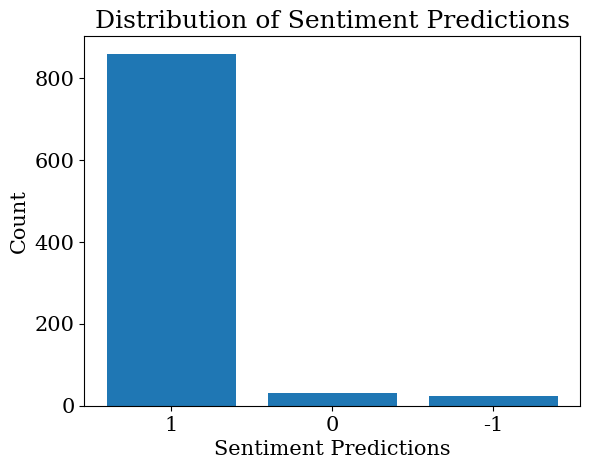

In [346]:
import matplotlib.pyplot as plt

# Assuming combined_df['Predictions'] contains the predictions
prediction_counts = combined_df['Predictions'].value_counts()

# Convert index to string labels
prediction_counts.index = prediction_counts.index.astype(str)

# Plotting the bar chart
plt.bar(prediction_counts.index, prediction_counts.values)

# Adding labels and title
plt.xlabel('Sentiment Predictions')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Predictions')

# Display the plot
plt.show()


## Overall Analysis

In [347]:
# Initialize an empty dictionary to store frequencies and sentiment counts
aspect_dict = {'Aspect': [], 'Frequency': [], 'Positive': [], 'Neutral': [], 'Negative': []}

# Iterate through each row of the original dataframe
for index, row in combined_df.iterrows():
    aspects = row['aspect']
    sentiments = row['sentiment']

    # Iterate through each aspect and sentiment in the row
    for aspect, sentiment in zip(aspects, sentiments):
        # Check if the aspect already exists in aspect_dict
        if aspect in aspect_dict['Aspect']:
            aspect_index = aspect_dict['Aspect'].index(aspect)
        else:
            # If the aspect does not exist, add it to aspect_dict and append zeros to the sentiment lists
            aspect_dict['Aspect'].append(aspect)
            aspect_index = len(aspect_dict['Aspect']) - 1
            aspect_dict['Frequency'].append(0)
            aspect_dict['Positive'].append(0)
            aspect_dict['Neutral'].append(0)
            aspect_dict['Negative'].append(0)

        # Update aspect frequency
        aspect_dict['Frequency'][aspect_index] += 1

        # Update sentiment count
        if sentiment == 'Positive':
            aspect_dict['Positive'][aspect_index] += 1
        elif sentiment == 'Neutral':
            aspect_dict['Neutral'][aspect_index] += 1
        elif sentiment == 'Negative':
            aspect_dict['Negative'][aspect_index] += 1

# Convert the dictionary to a dataframe
aspect_df = pd.DataFrame(aspect_dict)
aspect_df


Aspect  Frequency  Positive  Neutral  Negative
0                   cookies        346       312        3        31
1                      they         49        47        0         2
2    oatmeal raisin cookies         28        22        1         5
3                   portion          4         4        0         0
4                     snack         73        65        7         1
..                      ...        ...       ...      ...       ...
163                 calorie          1         0        0         1
164        - raisin cookies          1         1        0         0
165                   meals          1         1        0         0
166               ice cream          1         0        1         0
167      individual packing          1         1        0         0

[168 rows x 5 columns]

                Aspect  Frequency  Negative  Positive  Neutral
53               sugar         11         8         2        1
25            calories          3         3         0        0
14   nutritional panel          2         2         0        0
142                fat          2         2         0        0
120        consistency          3         2         1        0
121    ingredient list          1         1         0        0
162         percentage          1         1         0        0
161              flour          1         1         0        0
153             sodium          1         1         0        0
149           portions          1         1         0        0
146    chocolate chips          1         1         0        0
135                get          1         1         0        0
115           raisin s          1         1         0        0
112     baking process          1         1         0        0
95               carbs          1         1         0  

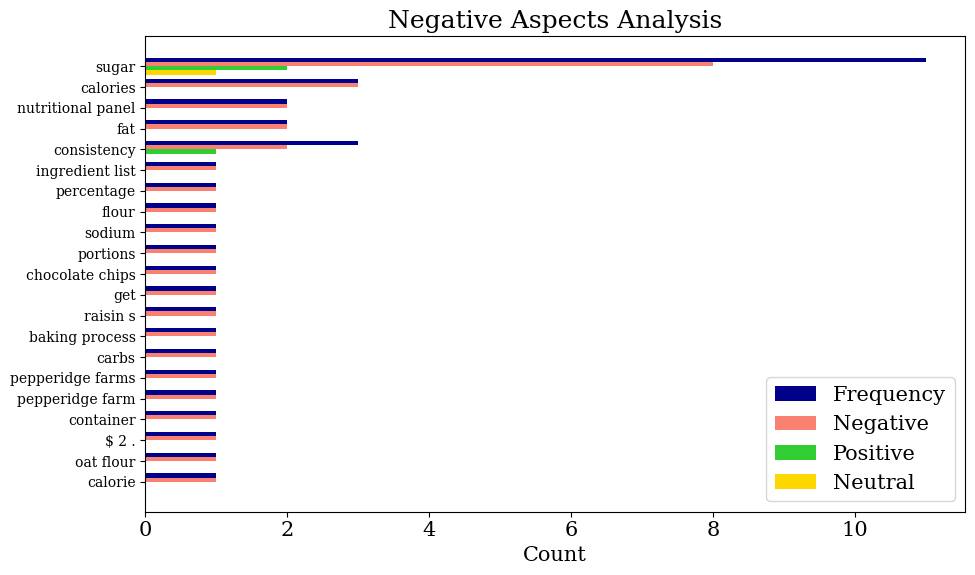

In [348]:
# Find the aspect that has more negative comments than positive+neutral
# Calculate the difference between negative and positive sentiment counts
aspect_df['Negative_Positive_Difference'] = aspect_df['Negative'] - aspect_df['Positive'] - aspect_df['Neutral']
# Filter aspects where negative comments outnumber positive comments
negative_aspects = aspect_df[aspect_df['Negative_Positive_Difference'] > 0]
negative_aspects['negative_proportion']= negative_aspects['Negative'] / negative_aspects['Frequency']
negative_aspects = negative_aspects.sort_values(by='Negative', ascending=False)

# Print the aspects
print(negative_aspects[['Aspect', 'Frequency','Negative', 'Positive', 'Neutral']])


# Set the aspects as x-axis labels
aspects = negative_aspects['Aspect']

plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the y-axis
r = np.arange(len(aspects))

# Create the vertical bar plot
plt.barh(r, negative_aspects['Frequency'], color='darkblue', height=bar_width,  label='Frequency')
plt.barh(r + bar_width, negative_aspects['Negative'], color='salmon', height=bar_width,label='Negative')
plt.barh(r + 2*bar_width, negative_aspects['Positive'], color='limegreen', height=bar_width,label='Positive')
plt.barh(r + 3*bar_width, negative_aspects['Neutral'], color='gold', height=bar_width, label='Neutral')

# Set the y-axis ticks and labels
plt.yticks(r + 1.5*bar_width, aspects, fontsize=10)

# Set the x-axis label
plt.xlabel('Count')

# Set the title
plt.title('Negative Aspects Analysis')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


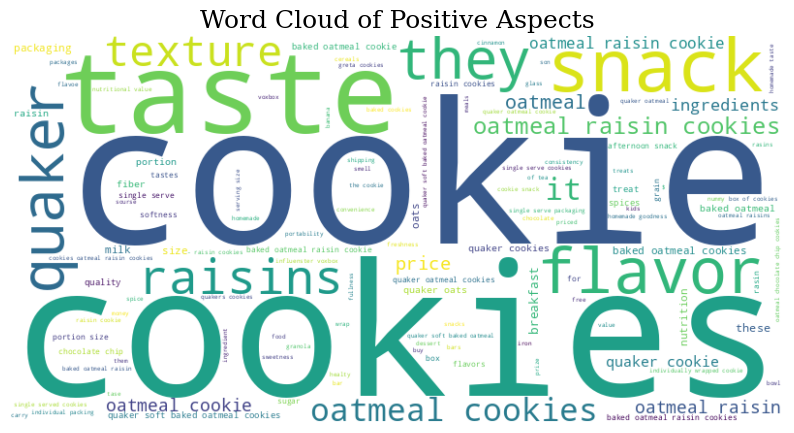

In [349]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extracting data for the word cloud
aspects = aspect_df['Aspect']
negative_counts = aspect_df['Positive']

# Creating a dictionary of words and their negative counts
word_count_dict = dict(zip(aspects, negative_counts))

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Aspects')
plt.show()


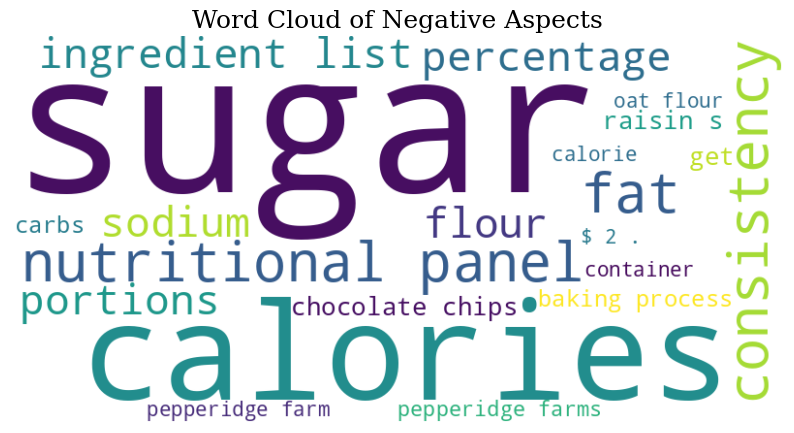

In [350]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extracting data for the word cloud
aspects = negative_aspects['Aspect']
negative_counts = negative_aspects['Negative']

# Creating a dictionary of words and their negative counts
word_count_dict = dict(zip(aspects, negative_counts))

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Aspects')
plt.show()


## Reviews Predicted as Positive

In [351]:
# filter the positively predicted reviews
positive_reviews = combined_df[combined_df['Predictions'] == 1]
positive_reviews

Unnamed: 0.1  Unnamed: 0   ProductId  \
0               0           0  B007JFMH8M   
1               1           1  B007JFMH8M   
2               2           2  B007JFMH8M   
3               3           3  B007JFMH8M   
4               4           4  B007JFMH8M   
..            ...         ...         ...   
908           908         908  B007JFMH8M   
909           909         909  B007JFMH8M   
910           910         910  B007JFMH8M   
911           911         911  B007JFMH8M   
912           912         912  B007JFMH8M   

                                          Summary_Text  Sentiment  \
0    ['delicious! i love these cookies!  not only a...          1   
1    ['great anytime of day! quaker soft baked oatm...          1   
2    ['very good! i am usually not a huge fan of oa...          1   
3    ['quaker oats oatmeal raisin mom voxbox review...          1   
4    ['quick, simple healthy snack for the kiddos!!...          1   
..                                                 ...        ...   
908  ["yummy! i loved these cookies and so did my k...          1   
909  ['quaker soft baked cookies this is a great ta...          1   
910  ["delicious! these are great for a quick snack...          1   
911  ['yummy i love the quaker soft baked cookies. ...          1   
912  ['quaker soft baked cookie this cookie is real...          1   

     Predictions                                           sentence  \
0              1  delicious ! i love these cookies ! not only ar...   
1              1  great anytime of day ! quaker soft baked oatme...   
2              1  very good ! i am usually not a huge fan of oat...   
3              1  quaker oats oatmeal raisin mom voxbox review c...   
4              1  quick , simple healthy snack for the kiddos ! ...   
..           ...                                                ...   
908            1  yummy ! i loved these cookies and so did my ki...   
909            1  quaker soft baked cookies this is a great tast...   
910            1  delicious ! these are great for a quick snack ...   
911            1  yummy i love the quaker soft baked cookies . t...   
912            1  quaker soft baked cookie this cookie is really...   

                                                   IOB  \
0    ['O', 'O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', '...   
1    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
2    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
3    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
4    ['O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', '...   
..                                                 ...   
908  ['O', 'O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', '...   
909  ['O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O', '...   
910  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-AS...   
911  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ASP', '...   
912  ['O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O', '...   

                                                tokens  \
0    ['delicious', '!', 'i', 'love', 'these', 'cook...   
1    ['great', 'anytime', 'of', 'day', '!', 'quaker...   
2    ['very', 'good', '!', 'i', 'am', 'usually', 'n...   
3    ['quaker', 'oats', 'oatmeal', 'raisin', 'mom',...   
4    ['quick', ',', 'simple', 'healthy', 'snack', '...   
..                                                 ...   
908  ['yummy', '!', 'i', 'loved', 'these', 'cookies...   
909  ['quaker', 'soft', 'baked', 'cookies', 'this',...   
910  ['delicious', '!', 'these', 'are', 'great', 'f...   
911  ['yummy', 'i', 'love', 'the', 'quaker', 'soft'...   
912  ['quaker', 'soft', 'baked', 'cookie', 'this', ...   

                                aspect              position  \
0                            [cookies]                 [[5]]   
1                                   []                    []   
2                      [cookies, they]          [[12], [22]]   
3    [oatmeal raisin cookies, portion]  [[72, 73, 74], [93]]   
4                      [snack, flavor]           [[4], [40]]   
..  

In [352]:
positive_reviews['aspect_count'].value_counts()

aspect_count
1    343
2    304
3    124
0     45
4     35
5      8
Name: count, dtype: int64

In [353]:
positive_reviews['negative_aspect_count'].value_counts()

negative_aspect_count
0    788
1     53
2     14
4      2
3      1
5      1
Name: count, dtype: int64

In [354]:
# Initialize an empty dictionary to store frequencies and sentiment counts
aspect_dict = {'Aspect': [], 'Frequency': [], 'Positive': [], 'Neutral': [], 'Negative': []}

# Iterate through each row of the original dataframe
for index, row in positive_reviews.iterrows():
    aspects = row['aspect']
    sentiments = row['sentiment']

    # Iterate through each aspect and sentiment in the row
    for aspect, sentiment in zip(aspects, sentiments):
        # Check if the aspect already exists in aspect_dict
        if aspect in aspect_dict['Aspect']:
            aspect_index = aspect_dict['Aspect'].index(aspect)
        else:
            # If the aspect does not exist, add it to aspect_dict and append zeros to the sentiment lists
            aspect_dict['Aspect'].append(aspect)
            aspect_index = len(aspect_dict['Aspect']) - 1
            aspect_dict['Frequency'].append(0)
            aspect_dict['Positive'].append(0)
            aspect_dict['Neutral'].append(0)
            aspect_dict['Negative'].append(0)

        # Update aspect frequency
        aspect_dict['Frequency'][aspect_index] += 1

        # Update sentiment count
        if sentiment == 'Positive':
            aspect_dict['Positive'][aspect_index] += 1
        elif sentiment == 'Neutral':
            aspect_dict['Neutral'][aspect_index] += 1
        elif sentiment == 'Negative':
            aspect_dict['Negative'][aspect_index] += 1

# Convert the dictionary to a dataframe
aspect_df = pd.DataFrame(aspect_dict)
aspect_df


Aspect  Frequency  Positive  Neutral  Negative
0                   cookies        332       311        2        19
1                      they         49        47        0         2
2    oatmeal raisin cookies         27        22        1         4
3                   portion          4         4        0         0
4                     snack         73        65        7         1
..                      ...        ...       ...      ...       ...
149                   spice          1         1        0         0
150                   nummy          1         1        0         0
151        - raisin cookies          1         1        0         0
152                   meals          1         1        0         0
153               ice cream          1         0        1         0

[154 rows x 5 columns]

                Aspect  Frequency  Negative  Positive  Neutral
46               sugar          7         4         2        1
14   nutritional panel          2         2         0        0
32               $ 2 .          1         1         0        0
64           container          1         1         0        0
87               carbs          1         1         0        0
106           raisin s          1         1         0        0
126                get          1         1         0        0
132                fat          1         1         0        0
136    chocolate chips          1         1         0        0
139           portions          1         1         0        0


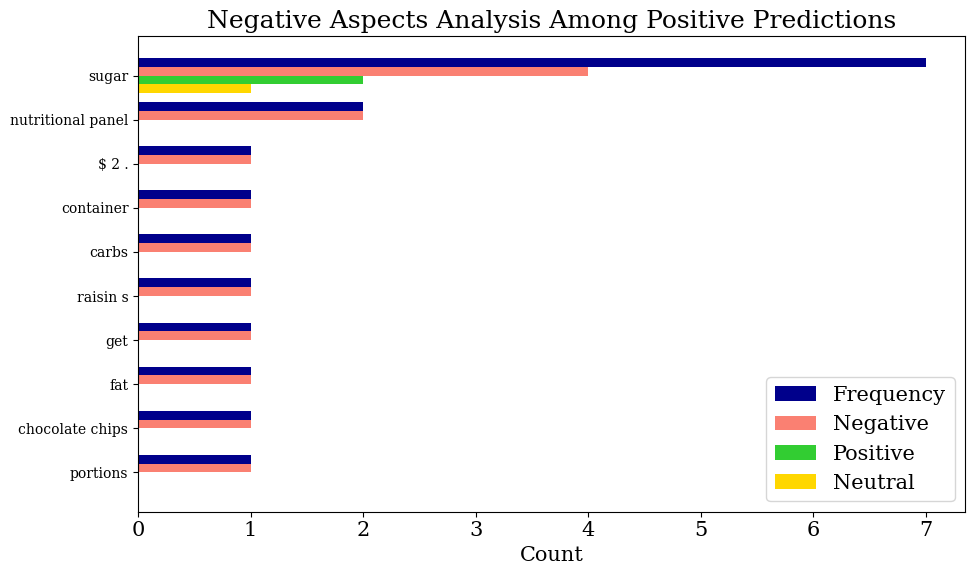

In [355]:
# Find the aspect that has more negative comments than positive+neutral
# Calculate the difference between negative and positive sentiment counts
aspect_df['Negative_Positive_Difference'] = aspect_df['Negative'] - aspect_df['Positive'] - aspect_df['Neutral']
# Filter aspects where negative comments outnumber positive comments
negative_aspects = aspect_df[aspect_df['Negative_Positive_Difference'] > 0]
negative_aspects['negative_proportion']= negative_aspects['Negative'] / negative_aspects['Frequency']
negative_aspects = negative_aspects.sort_values(by='Negative', ascending=False)

# Print the aspects
print(negative_aspects[['Aspect', 'Frequency','Negative', 'Positive', 'Neutral']])


# Set the aspects as x-axis labels
aspects = negative_aspects['Aspect']

plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the y-axis
r = np.arange(len(aspects))

# Create the vertical bar plot
plt.barh(r, negative_aspects['Frequency'], color='darkblue', height=bar_width,  label='Frequency')
plt.barh(r + bar_width, negative_aspects['Negative'], color='salmon', height=bar_width,label='Negative')
plt.barh(r + 2*bar_width, negative_aspects['Positive'], color='limegreen', height=bar_width,label='Positive')
plt.barh(r + 3*bar_width, negative_aspects['Neutral'], color='gold', height=bar_width, label='Neutral')

# Set the y-axis ticks and labels
plt.yticks(r + 1.5*bar_width, aspects, fontsize=10)

# Set the x-axis label
plt.xlabel('Count')

# Set the title
plt.title('Negative Aspects Analysis Among Positive Predictions')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


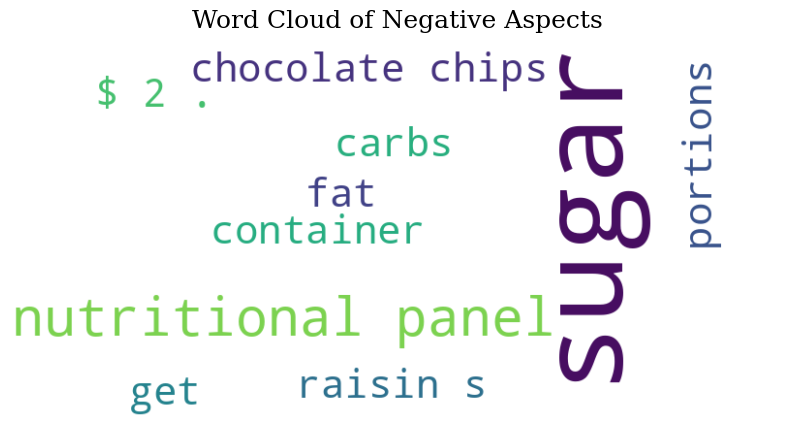

In [356]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extracting data for the word cloud
aspects = negative_aspects['Aspect']
negative_counts = negative_aspects['Negative']

# Creating a dictionary of words and their negative counts
word_count_dict = dict(zip(aspects, negative_counts))

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Aspects')
plt.show()


In [357]:
# Function to check if any item in a list is present in another list
def any_item_in_list_in_negative(item_list, negative_list):
    for item in item_list:
        if item in negative_list:
            return True
    return False

# Filter combined_df based on negative_aspects
filtered_df = positive_reviews[positive_reviews['aspect'].apply(lambda x: any_item_in_list_in_negative(x, negative_aspects['Aspect'].to_list()))]
filtered_df['sentence'].to_list()

['on the right road quaker used some good ingredients in the cookie and one cookie eaten amongst four kids did not meet the nutritional panel for one cookie . even if one cookie was eaten by them each the nutritional panel was pretty good . so , i can be a happy mom about the children eating the cookie',
 "great snack alternative for kids and adults ! i ' m not a fan of oatmeal or raisins ( lol ) but i wanted to taste the cookie before i gave it to my daughter . so i ' ll give my review based on how well she liked it . the cookie was extremely fresh when i opened it . my daughter ate about half of the cookie before putting the pack down . so i ' ll take that as she was somewhat satisfied because if she doesn ' t like it , she throws it aways and if she really likes it she ' ll eat it all ! ha ! i am interested in finding out what other types of cookies are available because it is a more healthier alternative versus her eating chips or candy . < br / > < br / > * * note : in my review ,

## Reviews Predicted as Negative

In [358]:
negative_reviews = combined_df[combined_df['Predictions'] == 0]
negative_reviews

Unnamed: 0.1  Unnamed: 0   ProductId  \
35             35          35  B007JFMH8M   
48             48          48  B007JFMH8M   
122           122         122  B007JFMH8M   
154           154         154  B007JFMH8M   
206           206         206  B007JFMH8M   
214           214         214  B007JFMH8M   
218           218         218  B007JFMH8M   
219           219         219  B007JFMH8M   
305           305         305  B007JFMH8M   
334           334         334  B007JFMH8M   
398           398         398  B007JFMH8M   
435           435         435  B007JFMH8M   
516           516         516  B007JFMH8M   
522           522         522  B007JFMH8M   
539           539         539  B007JFMH8M   
542           542         542  B007JFMH8M   
545           545         545  B007JFMH8M   
623           623         623  B007JFMH8M   
652           652         652  B007JFMH8M   
655           655         655  B007JFMH8M   
760           760         760  B007JFMH8M   
762           762         762  B007JFMH8M   
766           766         766  B007JFMH8M   
767           767         767  B007JFMH8M   
769           769         769  B007JFMH8M   
835           835         835  B007JFMH8M   
870           870         870  B007JFMH8M   
875           875         875  B007JFMH8M   
876           876         876  B007JFMH8M   
906           906         906  B007JFMH8M   

                                          Summary_Text  Sentiment  \
35   ["dry oatmeal cookies aren't my favorite but i...         -1   
48   ["well, the foil packet is handy... quaker sof...         -1   
122  ['its ok they are really soft and somewhat fre...          0   
154  ['ok my family and i tried this cookie and we ...          0   
206  ['not a cookie lover not really a cookie lover...          1   
214  ['just not a good cookie i am a cookie lover, ...         -1   
218  ["just ok, dry and crumbly they're cookies so ...          0   
219  ["soft but dry one star for being soft. one fo...          0   
305  ["ok, but not like homemade i'm glad i got to ...         -1   
334  ["were ok... these cookies were okay. my 2 & 6...          0   
398  ["y.u.m. i received this item in my mom voxbox...          1   
435  ['not so chewy, a bit dry maybe it was the hot...          0   
516  ["cookie wasn't sure if this cookie was going ...          1   
522  ["soft and flavorful cookie i recently receive...          1   
539  ['loved the cookie just not the flavor i loved...          1   
542  ["okay, tasty but okay nice flavor, and only 7...          0   
545  ["not bad for a packaged cookie these cookies ...          1   
623  ['just ok i am not crazy about cookies to begi...          1   
652  ['nice texture, not so much taste this is an i...          0   
655  ["not bad but not good either i'm always on th...         -1   
760  ['make sure you have a drink these individuall...          0   
762  ["not bad for mass produced.  not really great...          0   
766  ["soft, but not very much flavor as promised, ...          0   
767  ["tasty, but a tad on the dry side i hardly no...          0   
769  ["okay, but nothing extraordinary if you're th...          0   
835  ["my son loves it!! i received this product fr...          1   
870  ["ok taste, but too many questionable ingredie...         -1   
875  ["average taste, bad calories, insanely long l...         -1   
876  ["~~meh~~ let me start off by saying i'm a bit...         -1   
906  ["an ok cookie these cookies are reasonably ta...          0   

     Predictions                                           sentence  \
35             0  dry oatmeal cookies aren ' t my favorite but i...   
48             0  well , the foil packet is handy . . . quaker s...   
122            0  its ok they are really soft and somewhat fresh...   
154            0  ok my family and i tried this cookie and we al...   
206            0  not a cookie lover not really a cookie lover a...   
214            0  just not a good cookie i 

In [359]:
# Initialize an empty dictionary to store frequencies and sentiment counts
aspect_dict = {'Aspect': [], 'Frequency': [], 'Positive': [], 'Neutral': [], 'Negative': []}

# Iterate through each row of the original dataframe
for index, row in negative_reviews.iterrows():
    aspects = row['aspect']
    sentiments = row['sentiment']

    # Iterate through each aspect and sentiment in the row
    for aspect, sentiment in zip(aspects, sentiments):
        # Check if the aspect already exists in aspect_dict
        if aspect in aspect_dict['Aspect']:
            aspect_index = aspect_dict['Aspect'].index(aspect)
        else:
            # If the aspect does not exist, add it to aspect_dict and append zeros to the sentiment lists
            aspect_dict['Aspect'].append(aspect)
            aspect_index = len(aspect_dict['Aspect']) - 1
            aspect_dict['Frequency'].append(0)
            aspect_dict['Positive'].append(0)
            aspect_dict['Neutral'].append(0)
            aspect_dict['Negative'].append(0)

        # Update aspect frequency
        aspect_dict['Frequency'][aspect_index] += 1

        # Update sentiment count
        if sentiment == 'Positive':
            aspect_dict['Positive'][aspect_index] += 1
        elif sentiment == 'Neutral':
            aspect_dict['Neutral'][aspect_index] += 1
        elif sentiment == 'Negative':
            aspect_dict['Negative'][aspect_index] += 1

# Convert the dictionary to a dataframe
aspect_df = pd.DataFrame(aspect_dict)
aspect_df


Aspect  Frequency  Positive  Neutral  Negative
0              ingredient          1         0        0         1
1                    food          1         0        0         1
2                 cookies          7         1        1         5
3                calories          1         0        0         1
4                 texture          7         2        0         5
5                   taste          3         0        0         3
6                 raisins          3         1        0         2
7                  cookie         11         6        0         5
8                 oatmeal          3         0        0         3
9                  flavor          6         2        2         2
10        pepperidge farm          1         0        0         1
11       pepperidge farms          1         0        0         1
12                 quaker          1         1        0         0
13         baking process          1         0        0         1
14  nutrition information          1         0        1         0
15                  spice          1         0        0         1
16            consistency          2         0        0         2
17                  sugar          1         0        0         1
18            ingredients          2         0        0         2
19                  flour          1         0        0         1
20             percentage          1         0        0         1
21     individual packing          1         1        0         0
22                  lunch          1         0        1         0

              Aspect  Frequency  Negative  Positive  Neutral
2            cookies          7         5         1        1
4            texture          7         5         2        0
5              taste          3         3         0        0
8            oatmeal          3         3         0        0
6            raisins          3         2         1        0
18       ingredients          2         2         0        0
16       consistency          2         2         0        0
0         ingredient          1         1         0        0
15             spice          1         1         0        0
19             flour          1         1         0        0
17             sugar          1         1         0        0
10   pepperidge farm          1         1         0        0
13    baking process          1         1         0        0
11  pepperidge farms          1         1         0        0
1               food          1         1         0        0
3           calories    

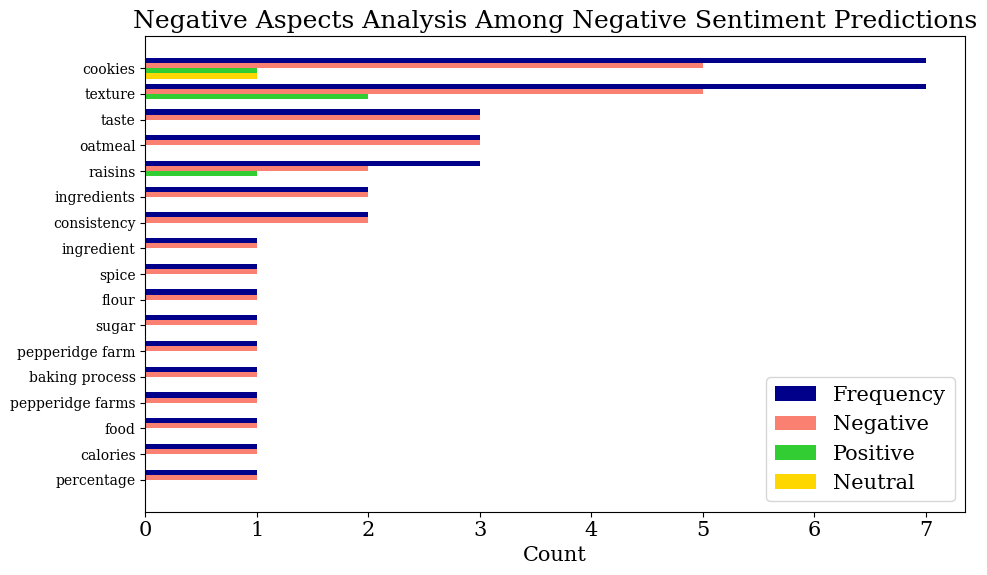

In [360]:
# Find the aspect that has more negative comments than positive+neutral
# Calculate the difference between negative and positive sentiment counts
aspect_df['Negative_Positive_Difference'] = aspect_df['Negative'] - aspect_df['Positive'] - aspect_df['Neutral']
# Filter aspects where negative comments outnumber positive comments
negative_aspects = aspect_df[aspect_df['Negative_Positive_Difference'] > 0]
negative_aspects['negative_proportion']= negative_aspects['Negative'] / negative_aspects['Frequency']
negative_aspects = negative_aspects.sort_values(by='Negative', ascending=False)

# Print the aspects
print(negative_aspects[['Aspect', 'Frequency','Negative', 'Positive', 'Neutral']])

# Set the aspects as x-axis labels
aspects = negative_aspects['Aspect']

plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the y-axis
r = np.arange(len(aspects))

# Create the vertical bar plot
plt.barh(r, negative_aspects['Frequency'], color='darkblue', height=bar_width,  label='Frequency')
plt.barh(r + bar_width, negative_aspects['Negative'], color='salmon', height=bar_width, label='Negative')
plt.barh(r + 2*bar_width, negative_aspects['Positive'], color='limegreen', height=bar_width, label='Positive')
plt.barh(r + 3*bar_width, negative_aspects['Neutral'], color='gold', height=bar_width,  label='Neutral')

# Set the y-axis ticks and labels
plt.yticks(r + 1.5*bar_width, aspects, fontsize=10)

# Set the x-axis label
plt.xlabel('Count')

# Set the title
plt.title('Negative Aspects Analysis Among Negative Sentiment Predictions')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


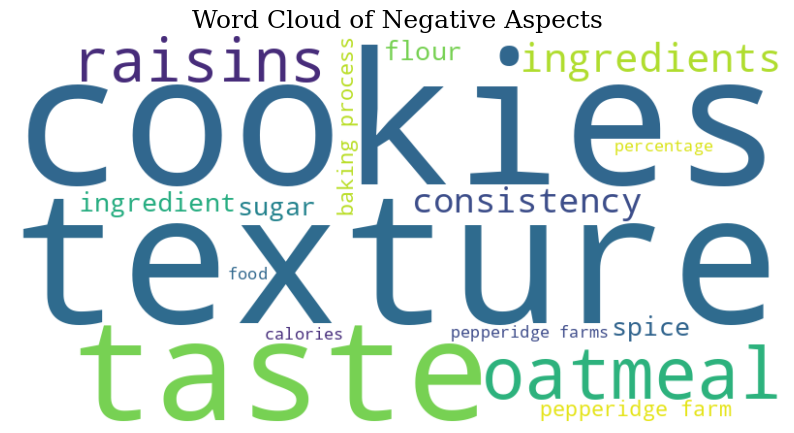

In [361]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extracting data for the word cloud
aspects = negative_aspects['Aspect']
negative_counts = negative_aspects['Negative']

# Creating a dictionary of words and their negative counts
word_count_dict = dict(zip(aspects, negative_counts))

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Aspects')
plt.show()


In [362]:
# Function to check if any item in a list is present in another list
def any_item_in_list_in_negative(item_list, negative_list):
    for item in item_list:
        if item in negative_list:
            return True
    return False

# Filter combined_df based on negative_aspects
filtered_df = negative_reviews[negative_reviews['aspect'].apply(lambda x: any_item_in_list_in_negative(x, ['cookies', 'texture', 'oatmeal', 'taste', 'consistency', 'ingredients']))]
filtered_df['sentence'].to_list()

["well , the foil packet is handy . . . quaker soft baked oatmeal cookies ( raisin ) fail the most important test of a cookie . they are not delicious . considering they ' re 170 calories for one cookie you ' d expect something decadent . it ' s not even as tasty as an average cookie . < br / > < br / > a little bit dry considering it ' s supposed to be soft , moist cookie . a slight sandy or grainy texture . there ' s nothing foul or obnoxious about the taste - it ' s just nothing special . < br / > < br / > nutritionally - ok for a cookie . 170 calories , 1 . 5g sat fat . 4g fiber ! ( quite a bit . ) but i don ' t look at a cookie as some sort of health food . a big * cookie like this should be an indulgence - a treat . instead it ' s not abhorrent . if you start eating this , you ' ll finish it . but you won ' t go out of your way for another one . < br / > < br / > * not that big . it ' s not like a famous amos or something .",
 'not a cookie lover not really a cookie lover and spe

# Aspect-based Sentiment Analysis on Top 2 Product

## Run PyABSA to get aspects and their sentiments

In [ ]:
df_2 = pd.read_csv('top_product_2.csv')
df_2

ProductId                                       Summary_Text  Sentiment  \
0    B006MONQMC  Light and flavorful; helps me drink more water...          1   
1    B006MONQMC  Wasn't bad I am a really big fan of these sque...          0   
2    B006MONQMC  Great vitamin/mineral additive I'm not a water...          1   
3    B006MONQMC  How much is a "squeeze"? This vitamin/caffeine...         -1   
4    B006MONQMC  So-so water additive I'm all for products that...          0   
..          ...                                                ...        ...   
486  B006MONQMC  For active adults, better choice than Mio This...          1   
487  B006MONQMC  Tastes good and works also with milk...I'm sol...          1   
488  B006MONQMC  Yuck!!! Qustionable benefits and tough to disp...         -1   
489  B006MONQMC  It's got electrolytes Or so the bottle wrappin...         -1   
490  B006MONQMC  Tasty...vitamins aside, it's making me drink m...          1   

     Predictions  
0              1  
1              1  
2             -1  
3              1  
4              0  
..           ...  
486            1  
487            1  
488           -1  
489            0  
490            1  

[491 rows x 4 columns]

In [ ]:
df_2['Summary_Text'] = df_2['Summary_Text'].str.lower()

df_2['Summary_Text'] = df_2['Summary_Text'].apply(lambda x: [x])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convert the 'Summary_Text' column to a list
inference_source = df_2['Summary_Text'].tolist()

result = []

# Extract aspects using ATEPC
for text in inference_source:
    atepc_result = aspect_extractor.extract_aspect(inference_source=text, pred_sentiment=True)
    result.append(atepc_result)

# Print the result
print(result)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

[2024-04-20 18:16:16] (2.4.1.post1) The results of aspect term extraction have been saved in /content/gdrive/MyDrive/BT5151 + BT5153 /BT5151 - Amazon Food Sentiment Analysis/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-20 18:16:16] (2.4.1.post1) Example 0: light and flavorful ; helps me drink more water i need to drink more water during the day . the vitamin squeeze gives regular water a nice light <flavor of fruit punch:Positive Confidence:0.9994> , helping me accomplish the goal of being well hydrated . the vitamins are a nice added benefit . one small downside is that the vitamin squeeze does need to be refrigerated after opening . otherwise , it ' s a great product .
[2024-04-20 18:16:18] (2.4.1.post1) The results of aspect term extraction have been saved in /content/gdrive/MyDrive/BT5151 + BT5153 /BT5151 - Amazon Food Sentiment Analysis/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-20 18:16:18] (2.4

In [ ]:
result_dfs = [pd.DataFrame(data) for data in result]
compbined_df = pd.DataFrame()
combined_df = pd.concat(result_dfs, ignore_index=True)
combined_df = pd.merge(df_1, combined_df, left_index=True, right_index=True)
combined_df

ProductId                                       Summary_Text  Sentiment  \
0    B007JFMH8M  [delicious! i love these cookies!  not only ar...          1   
1    B007JFMH8M  [great anytime of day! quaker soft baked oatme...          1   
2    B007JFMH8M  [very good! i am usually not a huge fan of oat...          1   
3    B007JFMH8M  [quaker oats oatmeal raisin mom voxbox review ...          1   
4    B007JFMH8M  [quick, simple healthy snack for the kiddos!!!...          1   
..          ...                                                ...        ...   
486  B007JFMH8M  [amazing! i received the quaker soft baked oat...          1   
487  B007JFMH8M  [could eat a million! i received the quaker so...          1   
488  B007JFMH8M  [soft and yummy i love these cookies, they are...          1   
489  B007JFMH8M  [great cookies these are really good cookies. ...          1   
490  B007JFMH8M  [yummy my son and i shared on and let me tell ...          1   

     Predictions                                           sentence  \
0              1  light and flavorful ; helps me drink more wate...   
1              1  wasn ' t bad i am a really big fan of these sq...   
2              1  great vitamin / mineral additive i ' m not a w...   
3              1  how much is a " squeeze " ? this vitamin / caf...   
4              1  so - so water additive i ' m all for products ...   
..           ...                                                ...   
486            1  for active adults , better choice than mio thi...   
487            1  tastes good and works also with milk . . . i '...   
488            1  yuck ! ! ! qustionable benefits and tough to d...   
489            1  it ' s got electrolytes or so the bottle wrapp...   
490            1  tasty . . . vitamins aside , it ' s making me ...   

                                                   IOB  \
0    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
1    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
2    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
3    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
4    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
..                                                 ...   
486  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
487  [B-ASP, O, O, B-ASP, O, O, O, O, O, O, O, O, O...   
488  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
489  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
490  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   

                                                tokens  \
0    [light, and, flavorful, ;, helps, me, drink, m...   
1    [wasn, ', t, bad, i, am, a, really, big, fan, ...   
2    [great, vitamin, /, mineral, additive, i, ', m...   
3    [how, much, is, a, ", squeeze, ", ?, this, vit...   
4    [so, -, so, water, additive, i, ', m, all, for...   
..                                                 ...   
486  [for, active, adults, ,, better, choice, than,...   
487  [tastes, good, and, works, also, with, milk, ....   
488  [yuck, !, !, !, qustionable, benefits, and, to...   
489  [it, ', s, got, electrolytes, or, so, the, bot...   
490  [tasty, ., ., ., vitamins, aside, ,, it, ', s,...   

                                   aspect                          position  \
0                 [flavor of fruit punch]                [[28, 29, 30, 31]]   
1                                      []                                []   
2                                      []                                []   
3    [water, flavor, oz, water, flavorer]  [[15], [28], [75], [120], [122]]   
4                                      []                                []   
..                                    ...                               ...   
486                                    []                                []   
487               [tastes, works, flavor]                  [[0], [3], [71]]   
488                                    []                                []

In [ ]:
result_dfs = [pd.DataFrame(data) for data in result]
compbined_df = pd.DataFrame()
combined_df = pd.concat(result_dfs, ignore_index=True)
combined_df = pd.merge(df_2, combined_df, left_index=True, right_index=True)
combined_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ProductId                                       Summary_Text  Sentiment  \
0    B006MONQMC  [light and flavorful; helps me drink more wate...          1   
1    B006MONQMC  [wasn't bad i am a really big fan of these squ...          0   
2    B006MONQMC  [great vitamin/mineral additive i'm not a wate...          1   
3    B006MONQMC  [how much is a "squeeze"? this vitamin/caffein...         -1   
4    B006MONQMC  [so-so water additive i'm all for products tha...          0   
..          ...                                                ...        ...   
486  B006MONQMC  [for active adults, better choice than mio thi...          1   
487  B006MONQMC  [tastes good and works also with milk...i'm so...          1   
488  B006MONQMC  [yuck!!! qustionable benefits and tough to dis...         -1   
489  B006MONQMC  [it's got electrolytes or so the bottle wrappi...         -1   
490  B006MONQMC  [tasty...vitamins aside, it's making me drink ...          1   

     Predictions                                           sentence  \
0              1  light and flavorful ; helps me drink more wate...   
1              1  wasn ' t bad i am a really big fan of these sq...   
2             -1  great vitamin / mineral additive i ' m not a w...   
3              1  how much is a " squeeze " ? this vitamin / caf...   
4              0  so - so water additive i ' m all for products ...   
..           ...                                                ...   
486            1  for active adults , better choice than mio thi...   
487            1  tastes good and works also with milk . . . i '...   
488           -1  yuck ! ! ! qustionable benefits and tough to d...   
489            0  it ' s got electrolytes or so the bottle wrapp...   
490            1  tasty . . . vitamins aside , it ' s making me ...   

                                                   IOB  \
0    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
1    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
2    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
3    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
4    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
..                                                 ...   
486  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
487  [B-ASP, O, O, B-ASP, O, O, O, O, O, O, O, O, O...   
488  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
489  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
490  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   

                                                tokens  \
0    [light, and, flavorful, ;, helps, me, drink, m...   
1    [wasn, ', t, bad, i, am, a, really, big, fan, ...   
2    [great, vitamin, /, mineral, additive, i, ', m...   
3    [how, much, is, a, ", squeeze, ", ?, this, vit...   
4    [so, -, so, water, additive, i, ', m, all, for...   
..                                                 ...   
486  [for, active, adults, ,, better, choice, than,...   
487  [tastes, good, and, works, also, with, milk, ....   
488  [yuck, !, !, !, qustionable, benefits, and, to...   
489  [it, ', s, got, electrolytes, or, so, the, bot...   
490  [tasty, ., ., ., vitamins, aside, ,, it, ', s,...   

                                   aspect                          position  \
0                 [flavor of fruit punch]                [[28, 29, 30, 31]]   
1                                      []                                []   
2                                      []                                []   
3    [water, flavor, oz, water, flavorer]  [[15], [28], [75], [120], [122]]   
4                                      []                                []   
..                                    ...                               ...   
486                                    []                                []   
487               [tastes, works, flavor]                  [[0], [3], [71]]   
488                                    []                                []

In [ ]:
combined_df.to_csv("top_2_B006MONQMC.csv")

Unnamed: 0   ProductId  \
0             0  B006MONQMC   
1             1  B006MONQMC   
2             2  B006MONQMC   
3             3  B006MONQMC   
4             4  B006MONQMC   
..          ...         ...   
486         486  B006MONQMC   
487         487  B006MONQMC   
488         488  B006MONQMC   
489         489  B006MONQMC   
490         490  B006MONQMC   

                                          Summary_Text  Sentiment  \
0    ["light and flavorful; helps me drink more wat...          1   
1    ["wasn't bad i am a really big fan of these sq...          0   
2    ["great vitamin/mineral additive i'm not a wat...          1   
3    ['how much is a "squeeze"? this vitamin/caffei...         -1   
4    ["so-so water additive i'm all for products th...          0   
..                                                 ...        ...   
486  ['for active adults, better choice than mio th...          1   
487  ['tastes good and works also with milk...i\'m ...          1   
488  ['yuck!!! qustionable benefits and tough to di...         -1   
489  ['it\'s got electrolytes or so the bottle wrap...         -1   
490  ["tasty...vitamins aside, it's making me drink...          1   

     Predictions                                           sentence  \
0              1  light and flavorful ; helps me drink more wate...   
1              1  wasn ' t bad i am a really big fan of these sq...   
2             -1  great vitamin / mineral additive i ' m not a w...   
3              1  how much is a " squeeze " ? this vitamin / caf...   
4              0  so - so water additive i ' m all for products ...   
..           ...                                                ...   
486            1  for active adults , better choice than mio thi...   
487            1  tastes good and works also with milk . . . i '...   
488           -1  yuck ! ! ! qustionable benefits and tough to d...   
489            0  it ' s got electrolytes or so the bottle wrapp...   
490            1  tasty . . . vitamins aside , it ' s making me ...   

                                                   IOB  \
0    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
1    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
2    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
3    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
4    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
..                                                 ...   
486  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
487  ['B-ASP', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O...   
488  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
489  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
490  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   

                                                tokens  \
0    ['light', 'and', 'flavorful', ';', 'helps', 'm...   
1    ['wasn', "'", 't', 'bad', 'i', 'am', 'a', 'rea...   
2    ['great', 'vitamin', '/', 'mineral', 'additive...   
3    ['how', 'much', 'is', 'a', '"', 'squeeze', '"'...   
4    ['so', '-', 'so', 'water', 'additive', 'i', "'...   
..                                                 ...   
486  ['for', 'active', 'adults', ',', 'better', 'ch...   
487  ['tastes', 'good', 'and', 'works', 'also', 'wi...   
488  ['yuck', '!', '!', '!', 'qustionable', 'benefi...   
489  ['it', "'", 's', 'got', 'electrolytes', 'or', ...   
490  ['tasty', '.', '.', '.', 'vitamins', 'aside', ...   

                                             aspect  \
0                         ['flavor of fruit punch']   
1                                                []   
2                                                []   
3    ['water', 'flavor', 'oz', 'water', 'flavorer']   
4                                                []   
..                                              ...   
486                                              []   
487                   ['tastes', 'works', 'flavor']   
488                                              []   
489   

## Load the aspect-based sentiment analysis result

In [363]:
combined_df = pd.read_csv("top_2_B006MONQMC.csv")
combined_df

Unnamed: 0   ProductId  \
0             0  B006MONQMC   
1             1  B006MONQMC   
2             2  B006MONQMC   
3             3  B006MONQMC   
4             4  B006MONQMC   
..          ...         ...   
486         486  B006MONQMC   
487         487  B006MONQMC   
488         488  B006MONQMC   
489         489  B006MONQMC   
490         490  B006MONQMC   

                                          Summary_Text  Sentiment  \
0    ["light and flavorful; helps me drink more wat...          1   
1    ["wasn't bad i am a really big fan of these sq...          0   
2    ["great vitamin/mineral additive i'm not a wat...          1   
3    ['how much is a "squeeze"? this vitamin/caffei...         -1   
4    ["so-so water additive i'm all for products th...          0   
..                                                 ...        ...   
486  ['for active adults, better choice than mio th...          1   
487  ['tastes good and works also with milk...i\'m ...          1   
488  ['yuck!!! qustionable benefits and tough to di...         -1   
489  ['it\'s got electrolytes or so the bottle wrap...         -1   
490  ["tasty...vitamins aside, it's making me drink...          1   

     Predictions                                           sentence  \
0              1  light and flavorful ; helps me drink more wate...   
1              1  wasn ' t bad i am a really big fan of these sq...   
2             -1  great vitamin / mineral additive i ' m not a w...   
3              1  how much is a " squeeze " ? this vitamin / caf...   
4              0  so - so water additive i ' m all for products ...   
..           ...                                                ...   
486            1  for active adults , better choice than mio thi...   
487            1  tastes good and works also with milk . . . i '...   
488           -1  yuck ! ! ! qustionable benefits and tough to d...   
489            0  it ' s got electrolytes or so the bottle wrapp...   
490            1  tasty . . . vitamins aside , it ' s making me ...   

                                                   IOB  \
0    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
1    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
2    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
3    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
4    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
..                                                 ...   
486  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
487  ['B-ASP', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O...   
488  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
489  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
490  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   

                                                tokens  \
0    ['light', 'and', 'flavorful', ';', 'helps', 'm...   
1    ['wasn', "'", 't', 'bad', 'i', 'am', 'a', 'rea...   
2    ['great', 'vitamin', '/', 'mineral', 'additive...   
3    ['how', 'much', 'is', 'a', '"', 'squeeze', '"'...   
4    ['so', '-', 'so', 'water', 'additive', 'i', "'...   
..                                                 ...   
486  ['for', 'active', 'adults', ',', 'better', 'ch...   
487  ['tastes', 'good', 'and', 'works', 'also', 'wi...   
488  ['yuck', '!', '!', '!', 'qustionable', 'benefi...   
489  ['it', "'", 's', 'got', 'electrolytes', 'or', ...   
490  ['tasty', '.', '.', '.', 'vitamins', 'aside', ...   

                                             aspect  \
0                         ['flavor of fruit punch']   
1                                                []   
2                                                []   
3    ['water', 'flavor', 'oz', 'water', 'flavorer']   
4                                                []   
..                                              ...   
486                                              []   
487                   ['tastes', 'works', 'flavor']   
488                                              []   
489   

In [364]:
# Count the number of aspects identified
import ast
combined_df['aspect'] = combined_df['aspect'].apply(lambda x: ast.literal_eval(x))
combined_df['aspect_count'] = combined_df['aspect'].apply(lambda x: len(x))

# Print the result
print(combined_df['aspect_count'].value_counts())

aspect_count
0    171
2     91
3     85
1     77
4     42
5     17
6      8
Name: count, dtype: int64


In [365]:
combined_df[combined_df['aspect_count']>0][['sentence', 'Predictions', 'tokens', 'aspect', 'sentiment',  'probs', 'confidence']].sample(5)

sentence  Predictions  \
216  flavors my drink , no boost to be found it did...            0   
328  i love it this is a great product i am sure i ...            1   
471  helpful product for people bored by plain wate...            1   
265  tastes okay and is very convenient out of the ...            0   
229  good flavor - convienant the product has a goo...            1   

                                                tokens  \
216  ['flavors', 'my', 'drink', ',', 'no', 'boost',...   
328  ['i', 'love', 'it', 'this', 'is', 'a', 'great'...   
471  ['helpful', 'product', 'for', 'people', 'bored...   
265  ['tastes', 'okay', 'and', 'is', 'very', 'conve...   
229  ['good', 'flavor', '-', 'convienant', 'the', '...   

                                 aspect  \
216       [drink, water, taste, energy]   
328                             [value]   
471                       [fruit punch]   
265  [tastes, vitamin c, vitamins, use]   
229   [flavor, fruit punch, portabilty]   

                                            sentiment  \
216  ['Negative', 'Negative', 'Negative', 'Negative']   
328                                      ['Positive']   
471                                      ['Negative']   
265  ['Positive', 'Positive', 'Positive', 'Negative']   
229              ['Positive', 'Positive', 'Negative']   

                                                 probs  \
216  [[0.9934430122375488, 0.005643112119287252, 0....   
328  [[0.007235057186335325, 0.0004497287154663354,...   
471  [[0.9441839456558228, 0.05513867735862732, 0.0...   
265  [[0.24322134256362915, 0.016349492594599724, 0...   
229  [[0.10049782693386078, 0.0006530506070703268, ...   

                           confidence  
216   [0.9934, 0.989, 0.9876, 0.9962]  
328                          [0.9923]  
471                          [0.9442]  
265  [0.7404, 0.9766, 0.5039, 0.5824]  
229           [0.8988, 0.997, 0.9976]

In [366]:
# Find the reviews that contain negative aspect
# Initialize a new column to indicate if the record contains a negative aspect
import ast
combined_df['sentiment'] = combined_df['sentiment'].apply(lambda x: ast.literal_eval(x))
combined_df['negative_aspect_count'] = 0

# Iterate through each row in the DataFrame
for index, row in combined_df.iterrows():
    # Check if any aspect in the 'aspect' column contains the word 'negative'
    for sentiment in row['sentiment']:
        # If found, set the 'has_negative_aspect' column to True for that row
        if 'Negative' in sentiment:
          combined_df.at[index, 'negative_aspect_count'] +=1
combined_df

Unnamed: 0   ProductId  \
0             0  B006MONQMC   
1             1  B006MONQMC   
2             2  B006MONQMC   
3             3  B006MONQMC   
4             4  B006MONQMC   
..          ...         ...   
486         486  B006MONQMC   
487         487  B006MONQMC   
488         488  B006MONQMC   
489         489  B006MONQMC   
490         490  B006MONQMC   

                                          Summary_Text  Sentiment  \
0    ["light and flavorful; helps me drink more wat...          1   
1    ["wasn't bad i am a really big fan of these sq...          0   
2    ["great vitamin/mineral additive i'm not a wat...          1   
3    ['how much is a "squeeze"? this vitamin/caffei...         -1   
4    ["so-so water additive i'm all for products th...          0   
..                                                 ...        ...   
486  ['for active adults, better choice than mio th...          1   
487  ['tastes good and works also with milk...i\'m ...          1   
488  ['yuck!!! qustionable benefits and tough to di...         -1   
489  ['it\'s got electrolytes or so the bottle wrap...         -1   
490  ["tasty...vitamins aside, it's making me drink...          1   

     Predictions                                           sentence  \
0              1  light and flavorful ; helps me drink more wate...   
1              1  wasn ' t bad i am a really big fan of these sq...   
2             -1  great vitamin / mineral additive i ' m not a w...   
3              1  how much is a " squeeze " ? this vitamin / caf...   
4              0  so - so water additive i ' m all for products ...   
..           ...                                                ...   
486            1  for active adults , better choice than mio thi...   
487            1  tastes good and works also with milk . . . i '...   
488           -1  yuck ! ! ! qustionable benefits and tough to d...   
489            0  it ' s got electrolytes or so the bottle wrapp...   
490            1  tasty . . . vitamins aside , it ' s making me ...   

                                                   IOB  \
0    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
1    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
2    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
3    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
4    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
..                                                 ...   
486  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
487  ['B-ASP', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O...   
488  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
489  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
490  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   

                                                tokens  \
0    ['light', 'and', 'flavorful', ';', 'helps', 'm...   
1    ['wasn', "'", 't', 'bad', 'i', 'am', 'a', 'rea...   
2    ['great', 'vitamin', '/', 'mineral', 'additive...   
3    ['how', 'much', 'is', 'a', '"', 'squeeze', '"'...   
4    ['so', '-', 'so', 'water', 'additive', 'i', "'...   
..                                                 ...   
486  ['for', 'active', 'adults', ',', 'better', 'ch...   
487  ['tastes', 'good', 'and', 'works', 'also', 'wi...   
488  ['yuck', '!', '!', '!', 'qustionable', 'benefi...   
489  ['it', "'", 's', 'got', 'electrolytes', 'or', ...   
490  ['tasty', '.', '.', '.', 'vitamins', 'aside', ...   

                                   aspect                          position  \
0                 [flavor of fruit punch]                [[28, 29, 30, 31]]   
1                                      []                                []   
2                                      []                                []   
3    [water, flavor, oz, water, flavorer]  [[15], [28], [75], [120], [122]]   
4                                      []                                []   
..                                    ...                               ...   
486

In [367]:
combined_df['negative_aspect_count'].value_counts()

negative_aspect_count
0    295
1     82
2     51
3     33
4     21
5      7
6      2
Name: count, dtype: int64

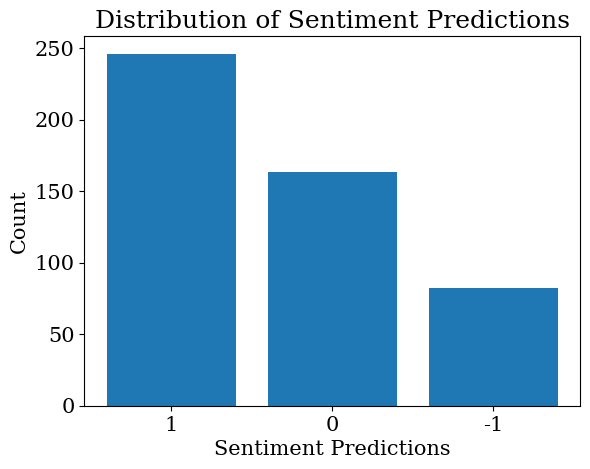

In [368]:

import matplotlib.pyplot as plt

# Assuming combined_df['Predictions'] contains the predictions
prediction_counts = combined_df['Predictions'].value_counts()

# Convert index to string labels
prediction_counts.index = prediction_counts.index.astype(str)

# Plotting the bar chart
plt.bar(prediction_counts.index, prediction_counts.values)

# Adding labels and title
plt.xlabel('Sentiment Predictions')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Predictions')

# Display the plot
plt.show()


## Overall Analysis

In [369]:
# Initialize an empty dictionary to store frequencies and sentiment counts
aspect_dict = {'Aspect': [], 'Frequency': [], 'Positive': [], 'Neutral': [], 'Negative': []}

# Iterate through each row of the original dataframe
for index, row in combined_df.iterrows():
    aspects = row['aspect']
    sentiments = row['sentiment']

    # Iterate through each aspect and sentiment in the row
    for aspect, sentiment in zip(aspects, sentiments):
        # Check if the aspect already exists in aspect_dict
        if aspect in aspect_dict['Aspect']:
            aspect_index = aspect_dict['Aspect'].index(aspect)
        else:
            # If the aspect does not exist, add it to aspect_dict and append zeros to the sentiment lists
            aspect_dict['Aspect'].append(aspect)
            aspect_index = len(aspect_dict['Aspect']) - 1
            aspect_dict['Frequency'].append(0)
            aspect_dict['Positive'].append(0)
            aspect_dict['Neutral'].append(0)
            aspect_dict['Negative'].append(0)

        # Update aspect frequency
        aspect_dict['Frequency'][aspect_index] += 1

        # Update sentiment count
        if sentiment == 'Positive':
            aspect_dict['Positive'][aspect_index] += 1
        elif sentiment == 'Neutral':
            aspect_dict['Neutral'][aspect_index] += 1
        elif sentiment == 'Negative':
            aspect_dict['Negative'][aspect_index] += 1

# Convert the dictionary to a dataframe
aspect_df = pd.DataFrame(aspect_dict)
aspect_df


Aspect  Frequency  Positive  Neutral  Negative
0    flavor of fruit punch          1         1        0         0
1                    water         43        12        6        25
2                   flavor         97        56        2        39
3                       oz          2         0        0         2
4                 flavorer          1         0        0         1
..                     ...        ...       ...      ...       ...
153                 change          2         2        0         0
154                   hint          1         1        0         0
155                  carry          1         0        0         1
156                  vodka          1         0        1         0
157                  works          1         1        0         0

[158 rows x 5 columns]

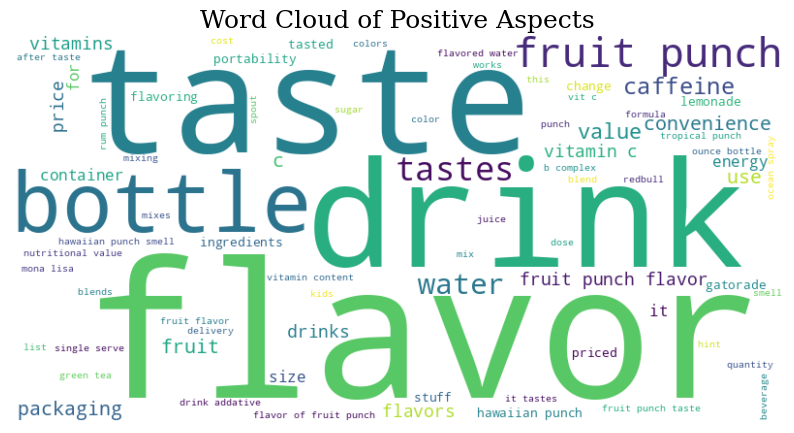

In [370]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extracting data for the word cloud
aspects = aspect_df['Aspect']
negative_counts = aspect_df['Positive']

# Creating a dictionary of words and their negative counts
word_count_dict = dict(zip(aspects, negative_counts))

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Aspects')
plt.show()


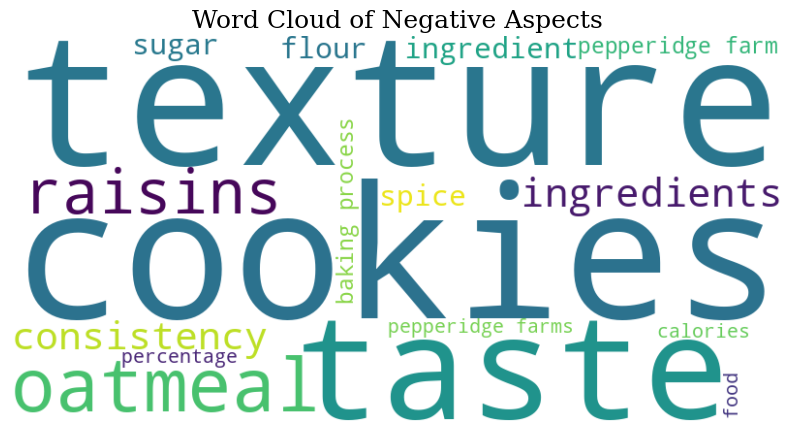

In [371]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extracting data for the word cloud
aspects = negative_aspects['Aspect']
negative_counts = negative_aspects['Negative']

# Creating a dictionary of words and their negative counts
word_count_dict = dict(zip(aspects, negative_counts))

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Aspects')
plt.show()


## Reviews Predicted as Positive

In [372]:
# filter the positively predicted reviews
positive_reviews = combined_df[combined_df['Predictions'] == 1]
positive_reviews

Unnamed: 0   ProductId  \
0             0  B006MONQMC   
1             1  B006MONQMC   
3             3  B006MONQMC   
6             6  B006MONQMC   
8             8  B006MONQMC   
..          ...         ...   
482         482  B006MONQMC   
484         484  B006MONQMC   
486         486  B006MONQMC   
487         487  B006MONQMC   
490         490  B006MONQMC   

                                          Summary_Text  Sentiment  \
0    ["light and flavorful; helps me drink more wat...          1   
1    ["wasn't bad i am a really big fan of these sq...          0   
3    ['how much is a "squeeze"? this vitamin/caffei...         -1   
6    ['like a faster & easier crystal light, with c...          1   
8    ['a tasty and convenient way to get a does of ...          1   
..                                                 ...        ...   
482  ["i like it. for a zero calorie soft drink, i ...          1   
484  ['yes! --finally a drink additive that i actua...          1   
486  ['for active adults, better choice than mio th...          1   
487  ['tastes good and works also with milk...i\'m ...          1   
490  ["tasty...vitamins aside, it's making me drink...          1   

     Predictions                                           sentence  \
0              1  light and flavorful ; helps me drink more wate...   
1              1  wasn ' t bad i am a really big fan of these sq...   
3              1  how much is a " squeeze " ? this vitamin / caf...   
6              1  like a faster & easier crystal light , with ca...   
8              1  a tasty and convenient way to get a does of en...   
..           ...                                                ...   
482            1  i like it . for a zero calorie soft drink , i ...   
484            1  yes ! - - finally a drink additive that i actu...   
486            1  for active adults , better choice than mio thi...   
487            1  tastes good and works also with milk . . . i '...   
490            1  tasty . . . vitamins aside , it ' s making me ...   

                                                   IOB  \
0    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
1    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
3    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
6    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
8    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
..                                                 ...   
482  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
484  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
486  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
487  ['B-ASP', 'O', 'O', 'B-ASP', 'O', 'O', 'O', 'O...   
490  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   

                                                tokens  \
0    ['light', 'and', 'flavorful', ';', 'helps', 'm...   
1    ['wasn', "'", 't', 'bad', 'i', 'am', 'a', 'rea...   
3    ['how', 'much', 'is', 'a', '"', 'squeeze', '"'...   
6    ['like', 'a', 'faster', '&', 'easier', 'crysta...   
8    ['a', 'tasty', 'and', 'convenient', 'way', 'to...   
..                                                 ...   
482  ['i', 'like', 'it', '.', 'for', 'a', 'zero', '...   
484  ['yes', '!', '-', '-', 'finally', 'a', 'drink'...   
486  ['for', 'active', 'adults', ',', 'better', 'ch...   
487  ['tastes', 'good', 'and', 'works', 'also', 'wi...   
490  ['tasty', '.', '.', '.', 'vitamins', 'aside', ...   

                                   aspect                          position  \
0                 [flavor of fruit punch]                [[28, 29, 30, 31]]   
1                                      []                                []   
3    [water, flavor, oz, water, flavorer]  [[15], [28], [75], [120], [122]]   
6                                      []                                []   
8         [vitamin c, vitamins, caffeine]            [[12, 13], [60], [67]]   
..                                    ...                               ...   
482

In [373]:
positive_reviews['aspect_count'].value_counts()

aspect_count
0    79
2    50
1    44
3    43
4    17
5    10
6     3
Name: count, dtype: int64

In [374]:
positive_reviews['negative_aspect_count'].value_counts()

negative_aspect_count
0    176
1     35
2     20
3     11
4      2
5      1
6      1
Name: count, dtype: int64

In [375]:
# Initialize an empty dictionary to store frequencies and sentiment counts
aspect_dict = {'Aspect': [], 'Frequency': [], 'Positive': [], 'Neutral': [], 'Negative': []}

# Iterate through each row of the original dataframe
for index, row in positive_reviews.iterrows():
    aspects = row['aspect']
    sentiments = row['sentiment']

    # Iterate through each aspect and sentiment in the row
    for aspect, sentiment in zip(aspects, sentiments):
        # Check if the aspect already exists in aspect_dict
        if aspect in aspect_dict['Aspect']:
            aspect_index = aspect_dict['Aspect'].index(aspect)
        else:
            # If the aspect does not exist, add it to aspect_dict and append zeros to the sentiment lists
            aspect_dict['Aspect'].append(aspect)
            aspect_index = len(aspect_dict['Aspect']) - 1
            aspect_dict['Frequency'].append(0)
            aspect_dict['Positive'].append(0)
            aspect_dict['Neutral'].append(0)
            aspect_dict['Negative'].append(0)

        # Update aspect frequency
        aspect_dict['Frequency'][aspect_index] += 1

        # Update sentiment count
        if sentiment == 'Positive':
            aspect_dict['Positive'][aspect_index] += 1
        elif sentiment == 'Neutral':
            aspect_dict['Neutral'][aspect_index] += 1
        elif sentiment == 'Negative':
            aspect_dict['Negative'][aspect_index] += 1

# Convert the dictionary to a dataframe
aspect_df = pd.DataFrame(aspect_dict)
aspect_df


Aspect  Frequency  Positive  Neutral  Negative
0    flavor of fruit punch          1         1        0         0
1                    water         21         9        4         8
2                   flavor         50        40        0        10
3                       oz          1         0        0         1
4                 flavorer          1         0        0         1
..                     ...        ...       ...      ...       ...
101               iced tea          1         0        1         0
102              nutrients          1         0        0         1
103                 change          2         2        0         0
104                   hint          1         1        0         0
105                  works          1         1        0         0

[106 rows x 5 columns]

                 Aspect  Frequency  Negative  Positive  Neutral
3                    oz          1         1         0        0
4              flavorer          1         1         0        0
7              caffeine          7         4         3        0
15           artificial          1         1         0        0
22          after taste          1         1         0        0
33              portion          1         1         0        0
36                   it          7         4         3        0
37              serving          1         1         0        0
41              squirts          1         1         0        0
42            packaging          7         4         3        0
50             caffiene          2         2         0        0
52        refrigeration          1         1         0        0
54                punch          1         1         0        0
57                stuff          5         3         2        0
58          screw - top          1      

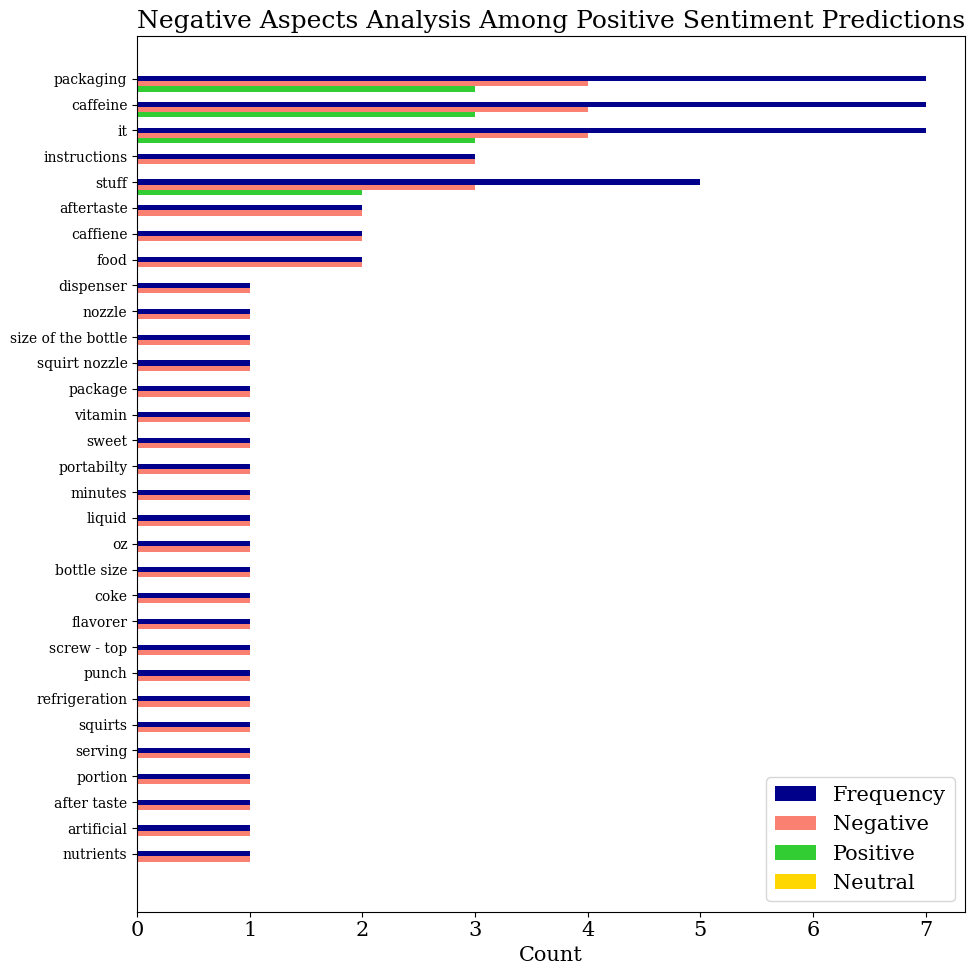

In [376]:
# Find the aspect that has more negative comments than positive+neutral
# Calculate the difference between negative and positive sentiment counts
aspect_df['Negative_Positive_Difference'] = aspect_df['Negative'] - aspect_df['Positive'] - aspect_df['Neutral']
# Filter aspects where negative comments outnumber positive comments
negative_aspects = aspect_df[aspect_df['Negative_Positive_Difference'] > 0]
negative_aspects['negative_proportion']= negative_aspects['Negative'] / negative_aspects['Frequency']

# Print the aspects
print(negative_aspects[['Aspect', 'Frequency','Negative', 'Positive', 'Neutral']])

# Sort negative aspects by 'Negative' count in descending order
top_negative_aspects = negative_aspects.sort_values(by='Negative', ascending=False)

# Display the top 15 features with the most negative count
print(top_negative_aspects[['Aspect', 'Frequency', 'Negative', 'Positive', 'Neutral']])

# Set the aspects as x-axis labels
aspects = top_negative_aspects['Aspect']

plt.figure(figsize=(10, 10))  # Increase the size of the figure

# Sort negative aspects by 'Negative' count in descending order
top_negative_aspects = negative_aspects.sort_values(by='Negative', ascending=False)

# Set the aspects as x-axis labels
aspects = top_negative_aspects['Aspect']

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the y-axis
r = np.arange(len(aspects))

# Create the vertical bar plot with more space between bars
plt.barh(r, top_negative_aspects['Frequency'], color='darkblue', height=bar_width, label='Frequency')
plt.barh(r + bar_width, top_negative_aspects['Negative'], color='salmon', height=bar_width, label='Negative')
plt.barh(r + 2 * bar_width, top_negative_aspects['Positive'], color='limegreen', height=bar_width, label='Positive')
plt.barh(r + 3 * bar_width, top_negative_aspects['Neutral'], color='gold', height=bar_width, label='Neutral')

# Set the y-axis ticks and labels
plt.yticks(r, aspects, fontsize=10)  # Keep the y-axis ticks at the original position

# Set the x-axis label
plt.xlabel('Count')

# Set the title
plt.title('Negative Aspects Analysis Among Positive Sentiment Predictions')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert the y-axis to have the bars with the most negative count at the top
plt.show()


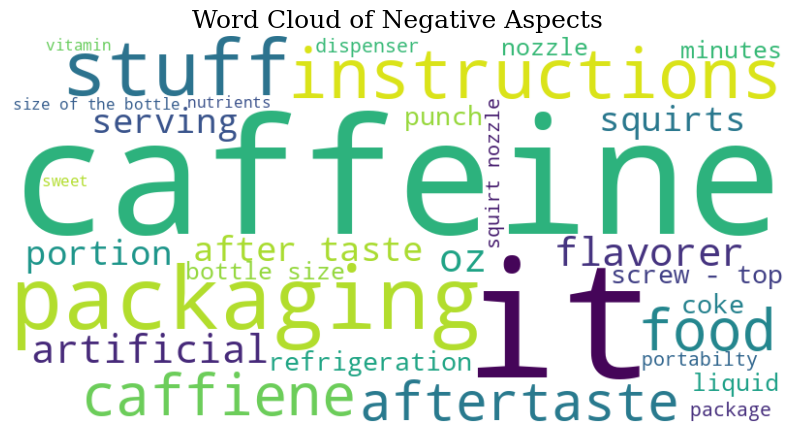

In [377]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extracting data for the word cloud
aspects = negative_aspects['Aspect']
negative_counts = negative_aspects['Negative']

# Creating a dictionary of words and their negative counts
word_count_dict = dict(zip(aspects, negative_counts))

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Aspects')
plt.show()


In [378]:
# Function to check if any item in a list is present in another list
def any_item_in_list_in_negative(item_list, negative_list):
    for item in item_list:
        if item in negative_list:
            return True
    return False

# Filter combined_df based on negative_aspects
filtered_df = positive_reviews[positive_reviews['aspect'].apply(lambda x: any_item_in_list_in_negative(x, negative_aspects['Aspect'].to_list()))]
filtered_df['sentence'].to_list()

['how much is a " squeeze " ? this vitamin / caffeine additive to plain water is not overly delicious . it has a rather strong cough syrup flavor , even at a " small squeeze " portion , and it is very red . there is not a single direction about how big a squeeze should be , though i suppose at 24 portions , one could divide and assume it is . 5 oz . i was hoping for a bit of a morning " pick up , " but the caffeine level is not enough for any sort of boost . i \' d rather take my vitamins as a pill and can \' t recommend this water - flavorer .',
 'a tasty and convenient way to get a does of energy and vitamin c . i have tried other " flavor enhancers " for water and founded that they tasted so artificial that they took away from the flavor of regular water instead of adding to it . this one tastes really good and provides the added benefit of some vitamins and energy in the form of caffeine . i enjoy it and find it very convenient . i think that you will like it too .',
 'good tasting

## Reviews Predicted as Negative

In [379]:
negative_reviews = combined_df[combined_df['Predictions'] == 0]
negative_reviews

Unnamed: 0   ProductId  \
4             4  B006MONQMC   
5             5  B006MONQMC   
7             7  B006MONQMC   
9             9  B006MONQMC   
10           10  B006MONQMC   
..          ...         ...   
478         478  B006MONQMC   
480         480  B006MONQMC   
481         481  B006MONQMC   
483         483  B006MONQMC   
489         489  B006MONQMC   

                                          Summary_Text  Sentiment  \
4    ["so-so water additive i'm all for products th...          0   
5    ["good flavor and not too sweet i drink a lot ...          1   
7    ['good flavor, not sure about benefits the fru...          1   
9    ["taste is there but it stains, bad!!! during ...         -1   
10   ['tastes like weak hawaiian punch with ingredi...         -1   
..                                                 ...        ...   
478  ['didn\'t love the flavor, but it is ok vitami...          1   
480  ['"a" for convenience.  "c" for flavor.  "b " ...          1   
481  ['lots of color but taste was a little disappo...          0   
483  ['on par with crystal light, but has vitamins ...          1   
489  ['it\'s got electrolytes or so the bottle wrap...         -1   

     Predictions                                           sentence  \
4              0  so - so water additive i ' m all for products ...   
5              0  good flavor and not too sweet i drink a lot of...   
7              0  good flavor , not sure about benefits the frui...   
9              0  taste is there but it stains , bad ! ! ! durin...   
10             0  tastes like weak hawaiian punch with ingredien...   
..           ...                                                ...   
478            0  didn ' t love the flavor , but it is ok vitami...   
480            0  " a " for convenience . " c " for flavor . " b...   
481            0  lots of color but taste was a little disappoin...   
483            0  on par with crystal light , but has vitamins a...   
489            0  it ' s got electrolytes or so the bottle wrapp...   

                                                   IOB  \
4    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
5    ['O', 'B-ASP', 'O', 'O', 'O', 'O', 'O', 'O', '...   
7    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
9    ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
10   ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
..                                                 ...   
478  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
480  ['O', 'O', 'O', 'O', 'B-ASP', 'O', 'O', 'O', '...   
481  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
483  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   
489  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...   

                                                tokens  \
4    ['so', '-', 'so', 'water', 'additive', 'i', "'...   
5    ['good', 'flavor', 'and', 'not', 'too', 'sweet...   
7    ['good', 'flavor', ',', 'not', 'sure', 'about'...   
9    ['taste', 'is', 'there', 'but', 'it', 'stains'...   
10   ['tastes', 'like', 'weak', 'hawaiian', 'punch'...   
..                                                 ...   
478  ['didn', "'", 't', 'love', 'the', 'flavor', ',...   
480  ['"', 'a', '"', 'for', 'convenience', '.', '"'...   
481  ['lots', 'of', 'color', 'but', 'taste', 'was',...   
483  ['on', 'par', 'with', 'crystal', 'light', ',',...   
489  ['it', "'", 's', 'got', 'electrolytes', 'or', ...   

                                                aspect  \
4                                                   []   
5    [flavor, fruit punch flavor, bottle, use, flavor]   
7                                                   []   
9                                                   []   
10                                                  []   
..                                                 ...   
478                                            [taste]   
480                       [convenience, flavor, vodka]   
481                               

In [380]:
# Initialize an empty dictionary to store frequencies and sentiment counts
aspect_dict = {'Aspect': [], 'Frequency': [], 'Positive': [], 'Neutral': [], 'Negative': []}

# Iterate through each row of the original dataframe
for index, row in negative_reviews.iterrows():
    aspects = row['aspect']
    sentiments = row['sentiment']

    # Iterate through each aspect and sentiment in the row
    for aspect, sentiment in zip(aspects, sentiments):
        # Check if the aspect already exists in aspect_dict
        if aspect in aspect_dict['Aspect']:
            aspect_index = aspect_dict['Aspect'].index(aspect)
        else:
            # If the aspect does not exist, add it to aspect_dict and append zeros to the sentiment lists
            aspect_dict['Aspect'].append(aspect)
            aspect_index = len(aspect_dict['Aspect']) - 1
            aspect_dict['Frequency'].append(0)
            aspect_dict['Positive'].append(0)
            aspect_dict['Neutral'].append(0)
            aspect_dict['Negative'].append(0)

        # Update aspect frequency
        aspect_dict['Frequency'][aspect_index] += 1

        # Update sentiment count
        if sentiment == 'Positive':
            aspect_dict['Positive'][aspect_index] += 1
        elif sentiment == 'Neutral':
            aspect_dict['Neutral'][aspect_index] += 1
        elif sentiment == 'Negative':
            aspect_dict['Negative'][aspect_index] += 1

# Convert the dictionary to a dataframe
aspect_df = pd.DataFrame(aspect_dict)
aspect_df


Aspect  Frequency  Positive  Neutral  Negative
0               flavor         30        12        2        16
1   fruit punch flavor          1         1        0         0
2               bottle         19         4        0        15
3                  use          2         0        0         2
4                taste         30        10        3        17
..                 ...        ...       ...      ...       ...
74           container          1         0        0         1
75  size of the bottle          1         0        0         1
76               carry          1         0        0         1
77              colors          1         0        0         1
78               vodka          1         0        1         0

[79 rows x 5 columns]

In [381]:
# Initialize an empty dictionary to store frequencies and sentiment counts
aspect_dict = {'Aspect': [], 'Frequency': [], 'Positive': [], 'Neutral': [], 'Negative': []}

# Iterate through each row of the original dataframe
for index, row in negative_reviews.iterrows():
    aspects = row['aspect']
    sentiments = row['sentiment']

    # Iterate through each aspect and sentiment in the row
    for aspect, sentiment in zip(aspects, sentiments):
        # Check if the aspect already exists in aspect_dict
        if aspect in aspect_dict['Aspect']:
            aspect_index = aspect_dict['Aspect'].index(aspect)
        else:
            # If the aspect does not exist, add it to aspect_dict and append zeros to the sentiment lists
            aspect_dict['Aspect'].append(aspect)
            aspect_index = len(aspect_dict['Aspect']) - 1
            aspect_dict['Frequency'].append(0)
            aspect_dict['Positive'].append(0)
            aspect_dict['Neutral'].append(0)
            aspect_dict['Negative'].append(0)

        # Update aspect frequency
        aspect_dict['Frequency'][aspect_index] += 1

        # Update sentiment count
        if sentiment == 'Positive':
            aspect_dict['Positive'][aspect_index] += 1
        elif sentiment == 'Neutral':
            aspect_dict['Neutral'][aspect_index] += 1
        elif sentiment == 'Negative':
            aspect_dict['Negative'][aspect_index] += 1

# Convert the dictionary to a dataframe
aspect_df = pd.DataFrame(aspect_dict)
aspect_df


Aspect  Frequency  Positive  Neutral  Negative
0               flavor         30        12        2        16
1   fruit punch flavor          1         1        0         0
2               bottle         19         4        0        15
3                  use          2         0        0         2
4                taste         30        10        3        17
..                 ...        ...       ...      ...       ...
74           container          1         0        0         1
75  size of the bottle          1         0        0         1
76               carry          1         0        0         1
77              colors          1         0        0         1
78               vodka          1         0        1         0

[79 rows x 5 columns]

                  Aspect  Frequency  Negative  Positive  Neutral
0                 flavor         30        16        12        2
2                 bottle         19        15         4        0
3                    use          2         2         0        0
4                  taste         30        17        10        3
6              packaging          8         5         2        1
7                    lid          3         3         0        0
8                   kool          3         3         0        0
9                  drink         24        14         8        2
11           fruit punch         16        10         5        1
12          cherry juice          1         1         0        0
13           ingredients          7         5         0        2
14           after taste          4         3         1        0
15               serving          3         3         0        0
17                 stuff          2         2         0        0
18                 light 

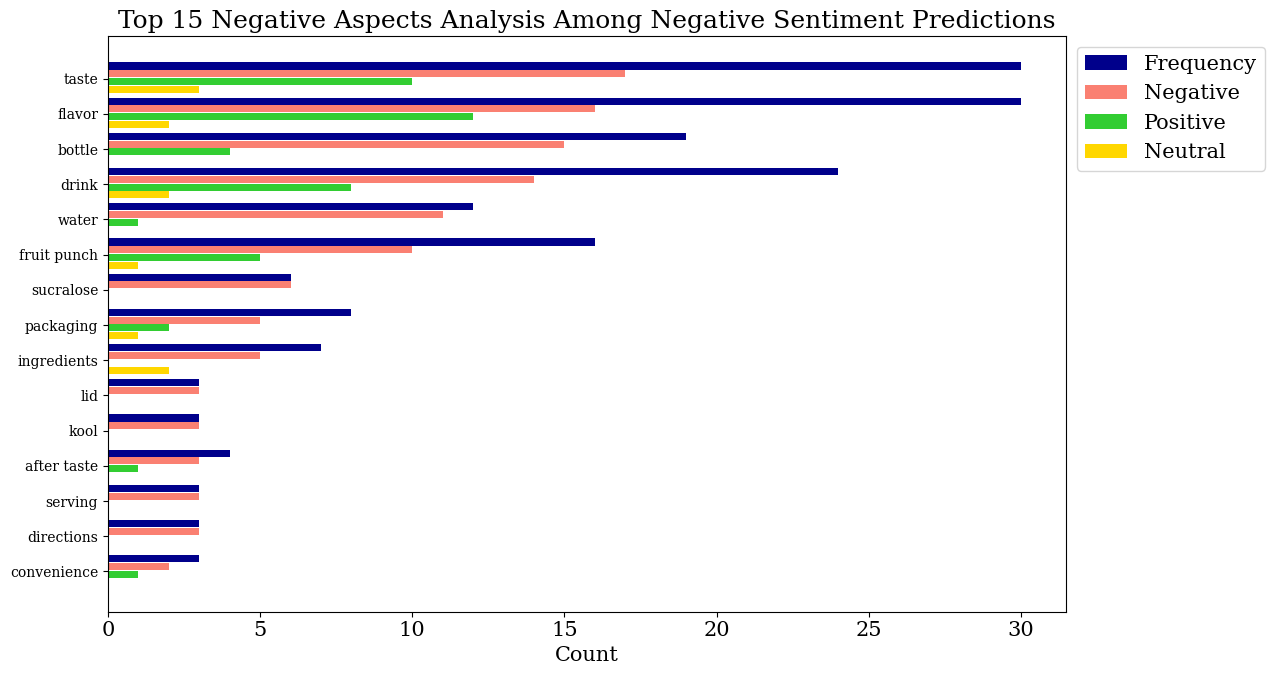

In [382]:
# Find the aspect that has more negative comments than positive+neutral
# Calculate the difference between negative and positive sentiment counts
aspect_df['Negative_Positive_Difference'] = aspect_df['Negative'] - aspect_df['Positive'] - aspect_df['Neutral']
# Filter aspects where negative comments outnumber positive comments
negative_aspects = aspect_df[aspect_df['Negative_Positive_Difference'] > 0]
negative_aspects['negative_proportion']= negative_aspects['Negative'] / negative_aspects['Frequency']

# Print the aspects
print(negative_aspects[['Aspect', 'Frequency','Negative', 'Positive', 'Neutral']])



# Display the top 15 features with the most negative count
print(top_negative_aspects[['Aspect', 'Frequency', 'Negative', 'Positive', 'Neutral']])

# Set the aspects as x-axis labels
aspects = top_negative_aspects['Aspect']

plt.figure(figsize=(13, 7))  # Increase the size of the figure

# Sort negative aspects by 'Negative' count in descending order
top_negative_aspects = negative_aspects.sort_values(by='Negative', ascending=False).head(15)

# Set the aspects as x-axis labels
aspects = top_negative_aspects['Aspect']

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the y-axis
r = np.arange(len(aspects))

# Create the vertical bar plot with more space between bars
plt.barh(r, top_negative_aspects['Frequency'], color='darkblue', height=bar_width, label='Frequency')
plt.barh(r + 1.1 * bar_width, top_negative_aspects['Negative'], color='salmon', height=bar_width, label='Negative')
plt.barh(r + 2.2 * bar_width, top_negative_aspects['Positive'], color='limegreen', height=bar_width, label='Positive')
plt.barh(r + 3.3 * bar_width, top_negative_aspects['Neutral'], color='gold', height=bar_width, label='Neutral')

# Set the y-axis ticks and labels
plt.yticks(r + 1.8 * bar_width, aspects, fontsize=10)  # Keep the y-axis ticks at the original position

# Set the x-axis label
plt.xlabel('Count')

# Set the title
plt.title('Top 15 Negative Aspects Analysis Among Negative Sentiment Predictions')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert the y-axis to have the bars with the most negative count at the top
plt.show()


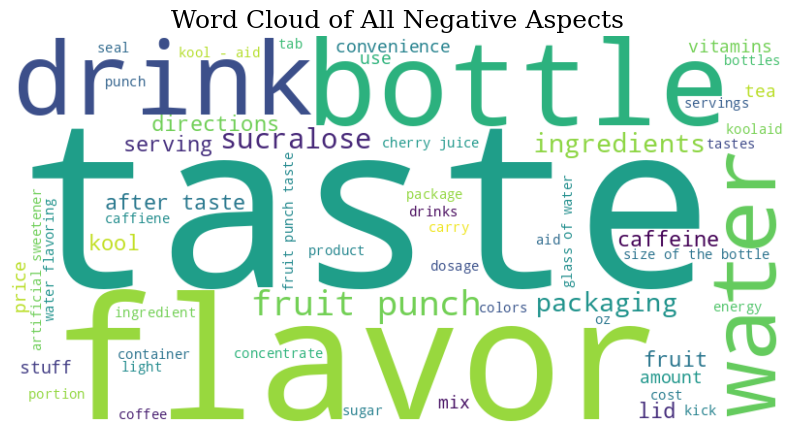

In [383]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extracting data for the word cloud
aspects = aspect_df['Aspect']
negative_counts = aspect_df['Negative']

# Creating a dictionary of words and their negative counts
word_count_dict = dict(zip(aspects, negative_counts))

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Negative Aspects')
plt.show()


In [384]:
len(['mobile_brand_name', 'mobile_marketing_name', 'age_in_year',
       'gender_name', 'marital_status', 'education_background', 'income_level',
       'occupation', 'overall_trx_freq', 'BUY_apr', 'BUY_may', 'SELL_apr',
       'SELL_may', 'BUY_1', 'BUY_2', 'BUY_3', 'BUY_4', 'BUY_5', 'BUY_6',
       'BUY_7', 'SELL_1', 'SELL_2', 'SELL_3', 'SELL_4', 'SELL_5', 'SELL_6',
       'SELL_7', 'BUY_Afternoon', 'BUY_Evening', 'BUY_Morning', 'BUY_Twilight',
       'SELL_Afternoon', 'SELL_Evening', 'SELL_Morning', 'SELL_Twilight',
       'BUY_crypto', 'BUY_fx', 'BUY_gold', 'BUY_gss', 'BUY_idss', 'BUY_mfund',
       'BUY_stock_index', 'SELL_crypto', 'SELL_fx', 'SELL_gold', 'SELL_gss',
       'SELL_idss', 'SELL_mfund', 'SELL_stock_index', 'BUY_apr_gtv_sum',
       'BUY_may_gtv_sum', 'SELL_apr_gtv_sum', 'SELL_may_gtv_sum',
       'BUY_crypto_gtv_mean', 'BUY_fx_gtv_mean', 'BUY_gold_gtv_mean',
       'BUY_gss_gtv_mean', 'BUY_idss_gtv_mean', 'BUY_mfund_gtv_mean',
       'BUY_stock_index_gtv_mean', 'SELL_crypto_gtv_mean', 'SELL_fx_gtv_mean',
       'SELL_gold_gtv_mean', 'SELL_gss_gtv_mean', 'SELL_idss_gtv_mean',
       'SELL_mfund_gtv_mean', 'SELL_stock_index_gtv_mean', 'max_gtv_4',
       'max_gtv_5', 'min_gtv_4', 'min_gtv_5', 'std_gtv_4', 'std_gtv_5',
       'monthly_trx_freq_x', 'monthly_trx_freq_y', 'weekly_trx_freq_x',
       'weekly_trx_freq_y', 'daily_trx_freq_x', 'daily_trx_freq_y',
       'hourly_trx_freq_x', 'hourly_trx_freq_y', 'hour'])

82